<a href="https://colab.research.google.com/github/emmetorior/CN7030-/blob/main/ASSN_CN7050_FINAL11a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CN7050 Intelligent Systems – Assessment &amp; NoteBook**

**Emmet O'Riordan 2760977 - Francesco Beninato 2760980** Group 4

CN7050 - Design and implementation - 24th March 2025<br>
University of East London - Lecturer: Umair ul Hassan<br>


---

# **<center>ASPECT-BASED SENTIMENT ANALYSIS (ABSA) & ASPECT CATEGORY DETECTION(ACD)</center>**



**<center>INTRODUCTION</center>**


1. **Overview**<br>
This assessment is based on the huggingface FABSA model which contains customer data in the form of user reviews, comments. This data can be used to analyse customer responses and sentiments using aspect-based customer analysis (ABSA) and to automatically detect the categories and run machine learning models to  predict the customer sentiment. In our project, we use three types of machine learning: <ul><li>1. traditional machine learning  <li>2. deep learning <li>3. large language models</ul>

<br>The FABSA benchmark dataset, labeled with aspect categories and sentiment scores, is used for training.
<br> We follow standard procedures here, including the following steps:
<ul>
<li>Data preprocessing, cleaning
<li>Tokenization and feature vectorization
<li>Model Training and evaluation for accuracy and F1-score
<ul>

2. **The Dataset**<br>
The dataset used in this project is the FABSA benchmark dataset available at Hugging Face and contains customer review information. These reviews contain aspect category labels along with sentiment scores (-1 for negative, 0 for neutral, and 1 for positive). https://huggingface.co/datasets/jordiclive/FABSA.


<html>
<head>
    <title>JordicLive FABSA Dataset Structure</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
    <h2>Dataset Structure</h2>
    <table>
        <tr>
            <th>Field</th>
            <th>Description</th>
        </tr>
        <tr>
            <td><strong>id</strong></td>
            <td>Unique identifier for each review.</td>
        </tr>
        <tr>
            <td><strong>org_index</strong></td>
            <td>Organization index.</td>
        </tr>
        <tr>
            <td><strong>data_source</strong></td>
            <td>Origin of the review (Google Play, Apple Store, etc.).</td>
        </tr>
        <tr>
            <td><strong>industry</strong></td>
            <td>Industry category of the product/service.</td>
        </tr>
        <tr>
            <td><strong>text</strong></td>
            <td>The review text.</td>
        </tr>
        <tr>
            <td><strong>labels</strong></td>
            <td>Aspect categories and their respective sentiment.</td>
        </tr>
        <tr>
            <td><strong>label_codes</strong></td>
            <td>Encoded aspect and sentiment information.</td>
        </tr>
    </table>
</body>
</html>
    
<br>

3. **Options**
<br>The original specification required three types of machine learning models to be used, from the three methodologies:
<br>1. Traditional Machine Learning
<br>2. Deep Learning
<br>3. Fine-tuned Large Language Models (LLMS)
<br>In terms of these classification problems, we wanted to identify methods that were appropriate. <br>
<!DOCTYPE html>
<html>
<head>
    <title>Comparison of Machine Learning Approaches for ABSA</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
    <h2>Comparison of Machine Learning Approaches for ABSA</h2>
    <table>
        <tr>
            <th>Approach</th>
            <th>Subtype 1</th>
            <th>Subtype 2</th>
            <th>Subtype 3</th>
            <th>Subtype 4</th>
            <th>Best Choice & Why?</th>
        </tr>
        <tr>
            <td><strong>A. Traditional ML</strong></td>
            <td>Logistic Regression (LR)</td>
            <td>Support Vector Machine (SVM)</td>
            <td>Naive Bayes (NB)</td>
            <td>Random Forest (RF)</td>
            <td><strong>SVM</strong>: Best for text classification with sparse vectors, good generalization</td>
        </tr>
        <tr>
            <td><strong>B. Deep Learning</strong></td>
            <td>Convolutional Neural Network (CNN)</td>
            <td>Recurrent Neural Network (RNN)</td>
            <td>Long Short-Term Memory (LSTM)</td>
            <td>Transformer-based models (BERT)</td>
            <td><strong>LSTM</strong>: Handles sequential dependencies well, better for sentiment understanding</td>
        </tr>
        <tr>
            <td><strong>C. Fine-Tuned LLMs</strong></td>
            <td>BERT</td>
            <td>RoBERTa</td>
            <td>T5</td>
            <td>GPT-based models</td>
            <td><strong>RoBERTa</strong>: Pretrained for sentence classification, robust for ABSA</td>
        </tr>
    </table>
</body>
</html>



**Multi-Class Classification Problem**

In our dataset the user has left a comment and or a feedback rating which is positive, negative or neutral. This is represented by the -1,0,1 values visible in the dataset.

<style>
  table {
    border-collapse: collapse;
    width: 100%;
  }

  th, td {
    border: 1px solid #ddd;
    padding: 8px;
    text-align: left;
  }

  th {
    background-color: #f2f2f2;
  }
</style>

<table>
  <tr>
    <th>User Rating</th>
    <th>Sentiment</th>
  </tr>
  <tr>
    <td>1</td>
    <td>POSITIVE</td>
  </tr>
  <tr>
    <td>0</td>
    <td>NEUTRAL</td>
  </tr>
  <tr>
    <td>-1</td>
    <td>NEGATIVE</td>
  </tr>
</table>


This completes our summary and here follows the implementation of the code in Python



# **BEGIN CODE**

# **Installations**

In [82]:
!pip install findspark
!pip install --upgrade pyspark pyarrow pandas
!pip install --upgrade torch torchvision torchaudio
!pip install --upgrade scikit-learn
!pip install nbconvert
!pip install colab-xterm %load_ext colabxterm.
from google.colab import drive

ERROR: Invalid requirement: '%load_ext': Expected package name at the start of dependency specifier
    %load_ext
    ^


In [83]:
#Break Colab - Memory issues - hack to cause reboot and increase the memory
#d=[]
#while(1):
#  d.append('1')

# **Import Libraries**

In [45]:
import pandas as pd
import pyspark
import pyarrow as pa
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import array_contains
from pyspark.sql.functions import col, explode, split, array, lit
from pyspark.ml.feature import CountVectorizer, IDF
import ast


# **Check Filepaths Exist and that files Are Readable.**

In [46]:
import os
parquet_validation_file = "/content/drive/MyDrive/Colab Notebooks/CN7050/validation-00000-of-00001.parquet"
print(os.path.exists(parquet_validation_file))

parquet_test_file = "/content/drive/MyDrive/Colab Notebooks/CN7050/test-00000-of-00001.parquet"
print(os.path.exists(parquet_test_file))

parquet_train_file = "/content/drive/MyDrive/Colab Notebooks/CN7050/train-00000-of-00001.parquet"
print(os.path.exists(parquet_train_file))

True
True
True


Load files into Spark. We have a train, test and validation file. Each one is loaded in from the parquet downloaded from huggingface.co

# **CREATE SPARK SESSION, SET OPTIONS, READ DATA**

In [47]:
spark = SparkSession.Builder().master("local[*]").getOrCreate()
spark.conf.set("spark.sql.parquet.mergeSchema", "false")
spark.conf.set("spark.sql.parquet.binaryAsString", "true")

In [48]:
dfs_train = spark.read.format("parquet").option("mergeSchema", "false").load(parquet_train_file)
dfs_test = spark.read.format("parquet").option("mergeSchema", "false").load(parquet_test_file)
dfs_validation = spark.read.format("parquet").option("mergeSchema", "false").load(parquet_validation_file)

**Checking the file contents**

In [84]:
dfs_train.show(2)
dfs_test.show(2)
dfs_validation.show(2)

+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+
|       id|org_index|data_source|        industry|                text|              labels|         label_codes|
+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+
|301972057|      600| Trustpilot|Price Comparison|My experience is ...|[[Staff support: ...|['staff-support.a...|
|301982453|      514|Google Play|         Banking|I love it so hand...|[[Company brand: ...|['company-brand.g...|
+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+
only showing top 2 rows

+---------+---------+-----------+------------+--------------------+--------------------+--------------------+
|       id|org_index|data_source|    industry|                text|              labels|         label_codes|
+---------+---------+-----------+------------+--------------------+----

**Check Schema**

In [50]:
print("Training file row count:", dfs_train.count())
dfs_train.printSchema()
print("Testing file row count:", dfs_test.count())
dfs_test.printSchema()
print("Validation file row count:", dfs_validation.count())
dfs_validation.printSchema()

Training file row count: 7930
root
 |-- id: long (nullable = true)
 |-- org_index: long (nullable = true)
 |-- data_source: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- text: string (nullable = true)
 |-- labels: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- label_codes: string (nullable = true)

Testing file row count: 1587
root
 |-- id: long (nullable = true)
 |-- org_index: long (nullable = true)
 |-- data_source: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- text: string (nullable = true)
 |-- labels: array (nullable = true)
 |    |-- element: array (containsNull = true)
 |    |    |-- element: string (containsNull = true)
 |-- label_codes: string (nullable = true)

Validation file row count: 1057
root
 |-- id: long (nullable = true)
 |-- org_index: long (nullable = true)
 |-- data_source: string (nullable = true)
 |-- industry: string (nullable = true

In [85]:
#findspark.init()
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import col, array_contains, lit, explode, udf
from pyspark.ml.classification import LogisticRegression, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler, HashingTF, IDF, Tokenizer
from pyspark.sql.types import ArrayType, StringType
import ast

Check for Nulls

In [87]:
null_counts_train = dfs_train.select([sum(col(c).isNull().cast("int")).alias(c) for c in dfs_train.columns])
null_counts_train.show()
null_counts_test = dfs_test.select([sum(col(c).isNull().cast("int")).alias(c) for c in dfs_test.columns])
null_counts_validation = dfs_validation.select([sum(col(c).isNull().cast("int")).alias(c) for c in dfs_validation.columns])

+---+---------+-----------+--------+----+------+-----------+
| id|org_index|data_source|industry|text|labels|label_codes|
+---+---------+-----------+--------+----+------+-----------+
|  0|        0|          0|       0|   0|     0|          0|
+---+---------+-----------+--------+----+------+-----------+



# **Extract Categories and Sentiment Values**

In [54]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType, StructType, StructField
import ast

# Extract sentiment values
@udf(returnType=ArrayType(StringType()))
def extract_sentiment_values(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [code.rsplit('.', 1)[1] for code in codes]
    return []

# Extract categories and sentiments as structs
@udf(returnType=ArrayType(StructType([
    StructField("category", StringType(), True),
    StructField("sentiment", StringType(), True)
])))

def extract_categories_and_sentiments(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [{"category": code.rsplit('.', 1)[0], "sentiment": code.rsplit('.', 1)[1]} for code in codes]
    return []
# [("category1", "-1"), ("category2", "0"), ...]
# Modify to return two lists instead.

# Check if a category has a specific sentiment (using structs)
@udf(returnType="integer")
def has_sentiment(category_sentiments, target_category, target_sentiment):
    if category_sentiments is None:
        return 0
    for item in category_sentiments:
        if item["category"] == target_category and item["sentiment"] == target_sentiment:
            return 1
    return 0

@udf(returnType=ArrayType(StringType()))   # For ACD
def extract_categories_only(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [code.rsplit('.', 1)[0] for code in codes]  # Extract only the category part
    return []

# **EXTRACT LABEL DATA TO SEPARATE CATEGORY COLS WITH SENTIMENT**
**ALSO DISPLAY CATEGORIES**

In [94]:
# Step 1: Extract categories and their sentiment values
#dfs_train_with_sentiment = dfs_train.withColumn("category_sentiments", extract_categories_and_sentiments(col("label_codes"))).limit(1000)
#dfs_test_with_sentiment = dfs_test.withColumn("category_sentiments", extract_categories_and_sentiments(col("label_codes"))).limit(1000)
#dfs_validation_with_sentiment = dfs_validation.withColumn("category_sentiments", extract_categories_and_sentiments(col("label_codes"))).limit(1000)#

# Step 2: Get all unique categories
#(all_categories, sentiments) = dfs_train_with_sentiment.select(explode("category_sentiments")).distinct().rdd.flatMap(lambda x: x[0]).collect()
#dfs_train_with_sentiment.show(5)
#for category in all_categories:
#    print(category)

# Step 1: Extract categories and their sentiment values
dfs_train_with_sentiment = dfs_train.withColumn("category_sentiments", extract_categories_and_sentiments(col("label_codes"))).limit(1000)
dfs_test_with_sentiment = dfs_test.withColumn("category_sentiments", extract_categories_and_sentiments(col("label_codes"))).limit(1000)
dfs_validation_with_sentiment = dfs_validation.withColumn("category_sentiments", extract_categories_and_sentiments(col("label_codes"))).limit(1000)

# Step 2: Get all unique categories
# Original line causing the error:
# (all_categories, sentiments) = dfs_train_with_sentiment.select(explode("category_sentiments")).distinct().rdd.flatMap(lambda x: x[0]).collect()

# Updated logic to extract categories and sentiments separately:
all_categories = dfs_train_with_sentiment.select(explode("category_sentiments")).select("col.category").distinct().rdd.flatMap(lambda x: x).collect()
sentiments = dfs_train_with_sentiment.select(explode("category_sentiments")).select("col.sentiment").distinct().rdd.flatMap(lambda x: x).collect()

dfs_train_with_sentiment.show(2) # checking the column has updated.

# extract_categories and display
print("*** LIST OF CATEGORIES EXTRACTED *** ")
for category in all_categories:
    print(category)

+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+--------------------+
|       id|org_index|data_source|        industry|                text|              labels|         label_codes| category_sentiments|
+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+--------------------+
|301972057|      600| Trustpilot|Price Comparison|My experience is ...|[[Staff support: ...|['staff-support.a...|[{staff-support.a...|
|301982453|      514|Google Play|         Banking|I love it so hand...|[[Company brand: ...|['company-brand.g...|[{company-brand.g...|
+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+--------------------+
only showing top 2 rows

*** LIST OF CATEGORIES EXTRACTED *** 
staff-support.attitude-of-staff
company-brand.reviews
company-brand.general-satisfaction
company-brand.competitor
logistics-rid

In [95]:
import json
# For each category extracted, creates new columns for each category sentiment, negative, neutral, and positive sentiment
for category in all_categories:
#    print(json.dumps(category, sort_keys=True, indent=4)
    clean_cat = category.replace('-', '_').replace('.', '_')
    # In the training data, Create columns for negative (-1), neutral (0), and positive (1) sentiment
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_negative",
        has_sentiment(col("category_sentiments"), lit(category), lit("-1"))
    )
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_neutral",
        has_sentiment(col("category_sentiments"), lit(category), lit("0"))
    )
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_positive",
        has_sentiment(col("category_sentiments"), lit(category), lit("1"))
    )

    # Test data
    dfs_test_with_sentiment = dfs_test_with_sentiment.withColumn(
        f"{clean_cat}_negative",
        has_sentiment(col("category_sentiments"), lit(category), lit("-1"))
    )
    dfs_test_with_sentiment = dfs_test_with_sentiment.withColumn(
        f"{clean_cat}_neutral",
        has_sentiment(col("category_sentiments"), lit(category), lit("0"))
    )
    dfs_test_with_sentiment = dfs_test_with_sentiment.withColumn(
        f"{clean_cat}_positive",
        has_sentiment(col("category_sentiments"), lit(category), lit("1"))
    )

    #Validation
    dfs_validation_with_sentiment = dfs_validation_with_sentiment.withColumn(
        f"{clean_cat}_negative",
        has_sentiment(col("category_sentiments"), lit(category), lit("-1"))
    )
    dfs_validation_with_sentiment = dfs_validation_with_sentiment.withColumn(
        f"{clean_cat}_neutral",
        has_sentiment(col("category_sentiments"), lit(category), lit("0"))
    )
    dfs_validation_with_sentiment = dfs_validation_with_sentiment.withColumn(
        f"{clean_cat}_positive",
        has_sentiment(col("category_sentiments"), lit(category), lit("1"))
    )

# Cache the relevant dataframes
dfs_train_with_sentiment.cache()
dfs_test_with_sentiment.cache()
dfs_validation_with_sentiment.cache()

DataFrame[id: bigint, org_index: bigint, data_source: string, industry: string, text: string, labels: array<array<string>>, label_codes: string, category_sentiments: array<struct<category:string,sentiment:string>>, staff_support_attitude_of_staff_negative: int, staff_support_attitude_of_staff_neutral: int, staff_support_attitude_of_staff_positive: int, company_brand_reviews_negative: int, company_brand_reviews_neutral: int, company_brand_reviews_positive: int, company_brand_general_satisfaction_negative: int, company_brand_general_satisfaction_neutral: int, company_brand_general_satisfaction_positive: int, company_brand_competitor_negative: int, company_brand_competitor_neutral: int, company_brand_competitor_positive: int, logistics_rides_speed_negative: int, logistics_rides_speed_neutral: int, logistics_rides_speed_positive: int, online_experience_app_website_negative: int, online_experience_app_website_neutral: int, online_experience_app_website_positive: int, purchase_booking_experi

# **TEXT VECTORIZATION**


In [57]:
# Step 4: Text vectorization with TF-IDF (same as before)
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=1000)
idf = IDF(inputCol="raw_features", outputCol="tfidf_features", minDocFreq=2)

# Apply transformations
train_tokenized = tokenizer.transform(dfs_train_with_sentiment)
test_tokenized = tokenizer.transform(dfs_test_with_sentiment)

train_hashed = hashingTF.transform(train_tokenized)
test_hashed = hashingTF.transform(test_tokenized)
idf_model = idf.fit(train_hashed)

train_tfidf = idf_model.transform(train_hashed)
test_tfidf = idf_model.transform(test_hashed)

# Step 5: Train sentiment classifiers for each category
from pyspark.ml.classification import LinearSVC, LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

sentiment_results = {}

In [58]:

dfs_train_with_sentiment.show(5)
for category in all_categories:
    print(category)

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create columns for negative (-1), neutral (0), and positive (1) sentiment
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_negative",
        has_sentiment(col("category_sentiments"), lit(category), lit("-1"))
    )
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_neutral",
        has_sentiment(col("category_sentiments"), lit(category), lit("0"))
    )
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_positive",
        has_sentiment(col("category_sentiments"), lit(category), lit("1"))
    )
    print (f"category {category}")
    dfs_train_with_sentiment.groupBy(f"{clean_cat}_negative").count().show()
    dfs_train_with_sentiment.groupBy(f"{clean_cat}_neutral").count().show()
    dfs_train_with_sentiment.groupBy(f"{clean_cat}_positive").count().show()

+---------+---------+-----------+----------------+--------------------+--------------------+--------------------+--------------------+----------------------------------------+---------------------------------------+----------------------------------------+------------------------------+-----------------------------+------------------------------+-------------------------------------------+------------------------------------------+-------------------------------------------+---------------------------------+--------------------------------+---------------------------------+------------------------------+-----------------------------+------------------------------+--------------------------------------+-------------------------------------+--------------------------------------+------------------------------------------------+-----------------------------------------------+------------------------------------------------+------------------------------------+-----------------------------

# **CNN Vs RoBERTa**

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Add RoBERTa imports
import transformers
from transformers import RobertaTokenizer, TFRobertaModel

# Convert to pandas for easier processing
train_pandas = dfs_train_with_sentiment.toPandas()
test_pandas = dfs_test_with_sentiment.toPandas()
validation_pandas = dfs_validation_with_sentiment.toPandas()

# RoBERTa Tokenizer and Model
roberta_model_name = 'roberta-base'
roberta_tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
roberta_model = TFRobertaModel.from_pretrained(roberta_model_name)

# Tokenize text for RoBERTa
def roberta_tokenize(texts, max_length=128):
    return roberta_tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='tf'
    )

# Existing Keras Tokenizer for CNN
keras_tokenizer = KerasTokenizer(num_words=10000)
keras_tokenizer.fit_on_texts(train_pandas['text'])

# Convert text to sequences for CNN
train_sequences = keras_tokenizer.texts_to_sequences(train_pandas['text'])
test_sequences = keras_tokenizer.texts_to_sequences(test_pandas['text'])
validation_sequences = keras_tokenizer.texts_to_sequences(validation_pandas['text'])

# Pad sequences for CNN
max_seq_length = 100
train_data_cnn = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data_cnn = pad_sequences(test_sequences, maxlen=max_seq_length)
validation_data_cnn = pad_sequences(validation_sequences, maxlen=max_seq_length)

# Tokenize for RoBERTa
train_data_roberta = roberta_tokenize(train_pandas['text'])
test_data_roberta = roberta_tokenize(test_pandas['text'])
validation_data_roberta = roberta_tokenize(validation_pandas['text'])

# Deep learning model results
dl_sentiment_results = {}

# For each category, train deep learning models
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create y labels
    # 0: negative, 1: neutral, 2: positive
    def create_sentiment_labels(df, category_col):
        neg_col = f"{category_col}_negative"
        neu_col = f"{category_col}_neutral"
        pos_col = f"{category_col}_positive"

        y = np.zeros(len(df))
        y[df[neg_col] == 1] = 0
        y[df[neu_col] == 1] = 1
        y[df[pos_col] == 1] = 2
        # Default to neutral if no sentiment is available
        y[(df[neg_col] == 0) & (df[neu_col] == 0) & (df[pos_col] == 0)] = 1

        return y

    y_train = create_sentiment_labels(train_pandas, clean_cat)
    y_test = create_sentiment_labels(test_pandas, clean_cat)
    y_val = create_sentiment_labels(validation_pandas, clean_cat)

    # Convert to one-hot encoding
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, 3)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, 3)
    y_val_one_hot = tf.keras.utils.to_categorical(y_val, 3)

    # CNN Model (existing implementation)
    vocab_size = min(10000, len(keras_tokenizer.word_index) + 1)
    embedding_dim = 100

    cnn_model = Sequential()
    #cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
    cnn_model.add(Embedding(vocab_size, embedding_dim)) # because input_length is deprecated.
    cnn_model.add(SpatialDropout1D(0.2))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(MaxPooling1D(5))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(3, activation='softmax'))  # 3 classes: negative, neutral, positive

    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # RoBERTa Model
    roberta_inputs = {
        'input_ids': train_data_roberta['input_ids'],
        'attention_mask': train_data_roberta['attention_mask']
    }

    roberta_base_model = roberta_model(roberta_inputs)[0]
    x = tf.keras.layers.GlobalAveragePooling1D()(roberta_base_model)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    roberta_output = tf.keras.layers.Dense(3, activation='softmax')(x)

    roberta_model_custom = tf.keras.Model(
        inputs=[
            roberta_inputs['input_ids'],
            roberta_inputs['attention_mask']
        ],
        outputs=roberta_output
    )

    roberta_model_custom.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early Stopping
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Train CNN
    cnn_history = cnn_model.fit(
        train_data_cnn, y_train_one_hot,
        validation_data=(validation_data_cnn, y_val_one_hot),
        epochs=10,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Train RoBERTa
    roberta_history = roberta_model_custom.fit(
        x=[
            train_data_roberta['input_ids'],
            train_data_roberta['attention_mask']
        ],
        y=y_train_one_hot,
        validation_data=(
            [validation_data_roberta['input_ids'], validation_data_roberta['attention_mask']],
            y_val_one_hot
        ),
        epochs=10,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Predict and Evaluate CNN
    y_pred_probs_cnn = cnn_model.predict(test_data_cnn)
    y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)
    accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
    report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

    # Predict and Evaluate RoBERTa
    y_pred_probs_roberta = roberta_model_custom.predict([
        test_data_roberta['input_ids'],
        test_data_roberta['attention_mask']
    ])
    y_pred_roberta = np.argmax(y_pred_probs_roberta, axis=1)
    accuracy_roberta = accuracy_score(y_test, y_pred_roberta)
    report_roberta = classification_report(y_test, y_pred_roberta, output_dict=True)

    # Store results
    dl_sentiment_results[category] = {
        "CNN": {
            "accuracy": accuracy_cnn,
            "f1_neg": report_cnn['0']['f1-score'] if '0' in report_cnn else 0,
            "f1_neu": report_cnn['1']['f1-score'] if '1' in report_cnn else 0,
            "f1_pos": report_cnn['2']['f1-score'] if '2' in report_cnn else 0,
            "f1_weighted": report_cnn['weighted avg']['f1-score']
        },
        "RoBERTa": {
            "accuracy": accuracy_roberta,
            "f1_neg": report_roberta['0']['f1-score'] if '0' in report_roberta else 0,
            "f1_neu": report_roberta['1']['f1-score'] if '1' in report_roberta else 0,
            "f1_pos": report_roberta['2']['f1-score'] if '2' in report_roberta else 0,
            "f1_weighted": report_roberta['weighted avg']['f1-score']
        }
    }

    print(f"Category: {category}")
    print("CNN Results:")
    print(f"Accuracy: {accuracy_cnn:.4f}, F1 (weighted): {report_cnn['weighted avg']['f1-score']:.4f}")
    print("RoBERTa Results:")
    print(f"Accuracy: {accuracy_roberta:.4f}, F1 (weighted): {report_roberta['weighted avg']['f1-score']:.4f}")

    # Visualization code remains the same for both models
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Confusion Matrix for CNN
    cm_cnn = confusion_matrix(y_test, y_pred_cnn)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'CNN Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Confusion Matrix for RoBERTa
    cm_roberta = confusion_matrix(y_test, y_pred_roberta)
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_roberta, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'RoBERTa Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{clean_cat}_comparison.png', dpi=300)
    plt.show()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

ValueError: All `inputs` values must be KerasTensors. Received: inputs=[<tf.Tensor: shape=(1000, 128), dtype=int32, numpy=
array([[    0,  2387,   676, ...,    54,    17,     2],
       [    0,   100,   657, ...,     1,     1,     1],
       [    0, 13624,    24, ...,     1,     1,     1],
       ...,
       [    0, 10365,  1365, ...,     1,     1,     1],
       [    0, 14323,     2, ...,     1,     1,     1],
       [    0,   100,   465, ...,     1,     1,     1]], dtype=int32)>, <tf.Tensor: shape=(1000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>] including invalid value [[    0  2387   676 ...    54    17     2]
 [    0   100   657 ...     1     1     1]
 [    0 13624    24 ...     1     1     1]
 ...
 [    0 10365  1365 ...     1     1     1]
 [    0 14323     2 ...     1     1     1]
 [    0   100   465 ...     1     1     1]] of type <class 'tensorflow.python.framework.ops.EagerTensor'>

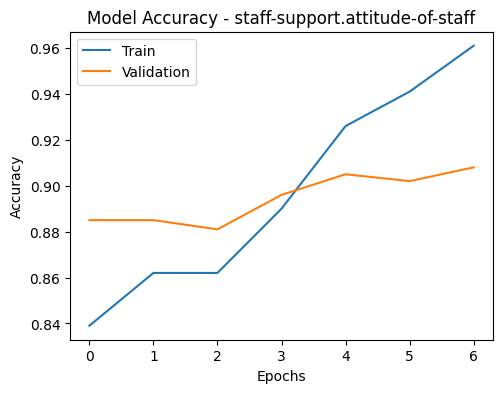

# **LOGISTIC REGRESSION vs CNNs vs RoBERTa**

In [98]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Scikit-learn Imports for Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# RoBERTa Imports
import transformers
from transformers import RobertaTokenizer, TFRobertaModel

# Convert to pandas for easier processing
train_pandas = dfs_train_with_sentiment.toPandas()
test_pandas = dfs_test_with_sentiment.toPandas()
validation_pandas = dfs_validation_with_sentiment.toPandas()

# Tokenize text for CNN - For CNN we are using Keras toknizer.
keras_tokenizer = KerasTokenizer(num_words=10000)
keras_tokenizer.fit_on_texts(train_pandas['text'])

# Convert text into sequences for the CNN
train_sequences = keras_tokenizer.texts_to_sequences(train_pandas['text'])
test_sequences = keras_tokenizer.texts_to_sequences(test_pandas['text'])
validation_sequences = keras_tokenizer.texts_to_sequences(validation_pandas['text'])

# Pading the sequences for CNN
max_seq_length = 100
train_data_cnn = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data_cnn = pad_sequences(test_sequences, maxlen=max_seq_length)
validation_data_cnn = pad_sequences(validation_sequences, maxlen=max_seq_length)

# RoBERTa Tokenizer and Model
roberta_model_name = 'roberta-base'   # this is robertas sentence-transformers model
roberta_tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
roberta_model = TFRobertaModel.from_pretrained(roberta_model_name)

# RoBERTa Tokenization Function
def roberta_tokenize(texts, max_length=128):
    return roberta_tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='tf'
    )

# Tokenize for RoBERTa
train_data_roberta = roberta_tokenize(train_pandas['text'])
test_data_roberta = roberta_tokenize(test_pandas['text'])
validation_data_roberta = roberta_tokenize(validation_pandas['text'])

# Multi-model sentiment results
sentiment_results = {}

# Sentiment label creation function
def create_sentiment_labels(df, category_col):
    neg_col = f"{category_col}_negative"
    neu_col = f"{category_col}_neutral"
    pos_col = f"{category_col}_positive"

    y = np.zeros(len(df))
    y[df[neg_col] == 1] = 0
    y[df[neu_col] == 1] = 1
    y[df[pos_col] == 1] = 2
    # Default to neutral if no sentiment is available
    y[(df[neg_col] == 0) & (df[neu_col] == 0) & (df[pos_col] == 0)] = 1

    return y

# Model training and evaluation loop
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Prepare labels
    y_train = create_sentiment_labels(train_pandas, clean_cat)
    y_test = create_sentiment_labels(test_pandas, clean_cat)
    y_val = create_sentiment_labels(validation_pandas, clean_cat)

    # One-hot encoding for deep learning models
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, 3)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, 3)
    y_val_one_hot = tf.keras.utils.to_categorical(y_val, 3)

    # 1. CNN Model
    vocab_size = min(10000, len(keras_tokenizer.word_index) + 1)
    embedding_dim = 100

    cnn_model = Sequential()
    cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
    cnn_model.add(SpatialDropout1D(0.2))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(MaxPooling1D(5))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(3, activation='softmax'))

    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 2. Logistic Regression Pipeline
    lr_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(
            multi_class='multinomial',
            solver='lbfgs',
            max_iter=1000,
            class_weight='balanced'
        ))
    ])

    # 3. RoBERTa Model
    roberta_inputs = {
        'input_ids': train_data_roberta['input_ids'],
        'attention_mask': train_data_roberta['attention_mask']
    }

    roberta_base_model = roberta_model(roberta_inputs)[0]
    x = tf.keras.layers.GlobalAveragePooling1D()(roberta_base_model)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    roberta_output = tf.keras.layers.Dense(3, activation='softmax')(x)

    roberta_model_custom = tf.keras.Model(
        inputs=[
            roberta_inputs['input_ids'],
            roberta_inputs['attention_mask']
        ],
        outputs=roberta_output
    )

    roberta_model_custom.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Training
    # CNN Training
    cnn_history = cnn_model.fit(
        train_data_cnn, y_train_one_hot,
        validation_data=(validation_data_cnn, y_val_one_hot),
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Logistic Regression Training
    lr_pipeline.fit(train_pandas['text'], y_train)

    # RoBERTa Training
    roberta_history = roberta_model_custom.fit(
        x=[
            train_data_roberta['input_ids'],
            train_data_roberta['attention_mask']
        ],
        y=y_train_one_hot,
        validation_data=(
            [validation_data_roberta['input_ids'], validation_data_roberta['attention_mask']],
            y_val_one_hot
        ),
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Predictions
    # CNN Predictions
    y_pred_probs_cnn = cnn_model.predict(test_data_cnn)
    y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)
    accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
    report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

    # Logistic Regression Predictions
    y_pred_lr = lr_pipeline.predict(test_pandas['text'])
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

    # RoBERTa Predictions
    y_pred_probs_roberta = roberta_model_custom.predict([
        test_data_roberta['input_ids'],
        test_data_roberta['attention_mask']
    ])
    y_pred_roberta = np.argmax(y_pred_probs_roberta, axis=1)
    accuracy_roberta = accuracy_score(y_test, y_pred_roberta)
    report_roberta = classification_report(y_test, y_pred_roberta, output_dict=True)

    # Store results
    sentiment_results[category] = {
        "CNN": {
            "accuracy": accuracy_cnn,
            "f1_neg": report_cnn['0']['f1-score'] if '0' in report_cnn else 0,
            "f1_neu": report_cnn['1']['f1-score'] if '1' in report_cnn else 0,
            "f1_pos": report_cnn['2']['f1-score'] if '2' in report_cnn else 0,
            "f1_weighted": report_cnn['weighted avg']['f1-score']
        },
        "Logistic Regression": {
            "accuracy": accuracy_lr,
            "f1_neg": report_lr['0']['f1-score'] if '0' in report_lr else 0,
            "f1_neu": report_lr['1']['f1-score'] if '1' in report_lr else 0,
            "f1_pos": report_lr['2']['f1-score'] if '2' in report_lr else 0,
            "f1_weighted": report_lr['weighted avg']['f1-score']
        },
        "RoBERTa": {
            "accuracy": accuracy_roberta,
            "f1_neg": report_roberta['0']['f1-score'] if '0' in report_roberta else 0,
            "f1_neu": report_roberta['1']['f1-score'] if '1' in report_roberta else 0,
            "f1_pos": report_roberta['2']['f1-score'] if '2' in report_roberta else 0,
            "f1_weighted": report_roberta['weighted avg']['f1-score']
        }
    }

    # Print results
    print(f"Category: {category}")
    print("CNN Results:")
    print(f"Accuracy: {accuracy_cnn:.4f}, F1 (weighted): {report_cnn['weighted avg']['f1-score']:.4f}")
    print("Logistic Regression Results:")
    print(f"Accuracy: {accuracy_lr:.4f}, F1 (weighted): {report_lr['weighted avg']['f1-score']:.4f}")
    print("RoBERTa Results:")
    print(f"Accuracy: {accuracy_roberta:.4f}, F1 (weighted): {report_roberta['weighted avg']['f1-score']:.4f}")

    # Visualization by category
    # Confusion Matrices
    plt.figure(figsize=(18, 5))

    # CNN Confusion Matrix
    plt.subplot(1, 3, 1)
    cm_cnn = confusion_matrix(y_test, y_pred_cnn)
    sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'CNN Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Logistic Regression Confusion Matrix
    plt.subplot(1, 3, 2)
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Logistic Regression Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # RoBERTa Confusion Matrix
    plt.subplot(1, 3, 3)
    cm_roberta = confusion_matrix(y_test, y_pred_roberta)
    sns.heatmap(cm_roberta, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'RoBERTa Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{clean_cat}_comparison.png', dpi=300)
    plt.show()

# Comparative Analysis Function
def compare_model_performance(results):
    """
    Compare performance of different models across categories
    """
    print("\nModel Performance Comparison:")
    for category, model_results in results.items():
        print(f"\nCategory: {category}")
        for model_name, metrics in model_results.items():
            print(f"{model_name}:")
            print(f"  Accuracy: {metrics['accuracy']:.4f}")
            print(f"  Weighted F1: {metrics['f1_weighted']:.4f}")

# Call comparative analysis
compare_model_performance(sentiment_results)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

ValueError: All `inputs` values must be KerasTensors. Received: inputs=[<tf.Tensor: shape=(1000, 128), dtype=int32, numpy=
array([[    0,  2387,   676, ...,    54,    17,     2],
       [    0,   100,   657, ...,     1,     1,     1],
       [    0, 13624,    24, ...,     1,     1,     1],
       ...,
       [    0, 10365,  1365, ...,     1,     1,     1],
       [    0, 14323,     2, ...,     1,     1,     1],
       [    0,   100,   465, ...,     1,     1,     1]], dtype=int32)>, <tf.Tensor: shape=(1000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>] including invalid value [[    0  2387   676 ...    54    17     2]
 [    0   100   657 ...     1     1     1]
 [    0 13624    24 ...     1     1     1]
 ...
 [    0 10365  1365 ...     1     1     1]
 [    0 14323     2 ...     1     1     1]
 [    0   100   465 ...     1     1     1]] of type <class 'tensorflow.python.framework.ops.EagerTensor'>

In [ ]:
#SWAPPING IN THIS WORKING CODE FROM MY EARLIER VERSION (assn_cn7050_final7)
# Prepare data for deep learning models
#import pandas as pd
#import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert to pandas for easier processing
#train_pandas = dfs_train_with_sentiment.toPandas()
#test_pandas = dfs_test_with_sentiment.toPandas()
#validation_pandas = dfs_validation_with_sentiment.toPandas()
train_pandas = dfs_train_with_sentiment.toPandas()
test_pandas = dfs_test_with_sentiment.toPandas()
validation_pandas = dfs_validation_with_sentiment.toPandas()

# Tokenize text
keras_tokenizer = KerasTokenizer(num_words=10000)
keras_tokenizer.fit_on_texts(train_pandas['text'])

# Convert text to sequences
train_sequences = keras_tokenizer.texts_to_sequences(train_pandas['text'])
test_sequences = keras_tokenizer.texts_to_sequences(test_pandas['text'])
validation_sequences = keras_tokenizer.texts_to_sequences(validation_pandas['text'])

# Pad sequences
max_seq_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data = pad_sequences(test_sequences, maxlen=max_seq_length)
validation_data = pad_sequences(validation_sequences, maxlen=max_seq_length)

# Deep learning model results
dl_sentiment_results = {}

# For each category, train a deep learning model
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create y labels
    # 0: negative, 1: neutral, 2: positive
    def create_sentiment_labels(df, category_col):
        neg_col = f"{category_col}_negative"
        neu_col = f"{category_col}_neutral"
        pos_col = f"{category_col}_positive"

        y = np.zeros(len(df))
        y[df[neg_col] == 1] = 0
        y[df[neu_col] == 1] = 1
        y[df[pos_col] == 1] = 2
        # Default to neutral if no sentiment is available
        y[(df[neg_col] == 0) & (df[neu_col] == 0) & (df[pos_col] == 0)] = 1

        return y

    y_train = create_sentiment_labels(train_pandas, clean_cat)
    y_test = create_sentiment_labels(test_pandas, clean_cat)
    y_val = create_sentiment_labels(validation_pandas, clean_cat)

    # Convert to one-hot encoding
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, 3)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, 3)
    y_val_one_hot = tf.keras.utils.to_categorical(y_val, 3)

    # Build the CNN model
    vocab_size = min(10000, len(keras_tokenizer.word_index) + 1)
    embedding_dim = 100

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))  # 3 classes: negative, neutral, positive

    # Note: to self.
    # source (V7 Labs): Categorical Cross Entropy is also known as Softmax Loss. It's a softmax activation plus a Cross-Entropy loss used for multiclass classification.
    # Using this loss, we can train a Convolutional Neural Network to output a probability over the N classes for each image.26 Jan 2023
    # Source (Geeks4Geeks) ...is a powerful loss function commonly used in multi-class classification problems.
    # By comparing the predicted probabilities to the true one-hot encoded labels, it guides the model's learning process, pushing it to make better predictions.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train with early stopping
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Epochs reduced for testing, but back again...
    history = model.fit(
        train_data, y_train_one_hot,
        validation_data=(validation_data, y_val_one_hot),
        epochs=3,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Evaluate
    y_pred_probs = model.predict(test_data)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    dl_sentiment_results[category] = {
        "accuracy": accuracy,
        "f1_neg": report['0']['f1-score'] if '0' in report else 0,
        "f1_neu": report['1']['f1-score'] if '1' in report else 0,
        "f1_pos": report['2']['f1-score'] if '2' in report else 0,
        "f1_weighted": report['weighted avg']['f1-score']
    }

    print(f"Category: {category}, Accuracy: {accuracy:.4f}, F1 (weighted): {report['weighted avg']['f1-score']:.4f}")
    print(f"F1 Scores - Negative: {report['0']['f1-score'] if '0' in report else 0:.4f}, " +
          f"Neutral: {report['1']['f1-score'] if '1' in report else 0:.4f}, " +
          f"Positive: {report['2']['f1-score'] if '2' in report else 0:.4f}")

    # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{clean_cat}.png', dpi=300)
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Model Accuracy - {category}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

**ACD** FIXME NEXT!!!!!! ONLY Version - Logistic Regression only **bold text**

In [ ]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# dummy data
dataset = pd.DataFrame({
    "text": [    "Gret customer service", "blah"    ],
    "category": ["customer_service", "website"]
})

# Cache df
dataset = dfs_train_with_sentiment.cache()
dfs_test_with_sentiment.cache()
dfs_validation_with_sentiment.cache()

# temp train-test split - replace with variables above.
train_texts, test_texts, train_labels, test_labels = train_test_split(
    dataset["text"], dataset["category"], test_size=0.2, random_state=42
)

# Convert labels to numerical format
categories = list(set(dataset["category"]))
category_to_id = {cat: idx for idx, cat in enumerate(categories)}
train_labels = train_labels.map(category_to_id)
test_labels = test_labels.map(category_to_id)

# -----------------
# 1. Logistic Regression Model
# -----------------
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(train_texts)
X_test_tfidf = tfidf.transform(test_texts)

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, train_labels)

lr_preds = lr_model.predict(X_test_tfidf)
lr_acc = accuracy_score(test_labels, lr_preds)
lr_f1 = f1_score(test_labels, lr_preds, average="weighted")

print(f"Logistic Regression - Accuracy: {lr_acc:.4f}, F1 Score: {lr_f1:.4f}")

# -----------------
# 2. CNN Model
# -----------------
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], truncation=True, padding="max_length", max_length=self.max_len, return_tensors="pt")
        return encoding["input_ids"].squeeze(), encoding["attention_mask"].squeeze(), torch.tensor(self.labels[idx])

class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.conv1 = nn.Conv1d(embed_dim, 128, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        self.fc = nn.Linear(128 * (128 // 2), num_classes)

    def forward(self, x):
        x = self.embedding(x).permute(0, 2, 1)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
train_dataset = TextDataset(train_texts.tolist(), train_labels.tolist(), tokenizer)
test_dataset = TextDataset(test_texts.tolist(), test_labels.tolist(), tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

cnn_model = CNNClassifier(vocab_size=30522, embed_dim=128, num_classes=len(categories))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

for epoch in range(5):  # Training loop
    for inputs, masks, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate CNN
cnn_preds, true_labels = [], []
for inputs, masks, labels in test_loader:
    with torch.no_grad():
        outputs = cnn_model(inputs)
    preds = torch.argmax(outputs, axis=1)
    cnn_preds.extend(preds.tolist())
    true_labels.extend(labels.tolist())

cnn_acc = accuracy_score(true_labels, cnn_preds)
cnn_f1 = f1_score(true_labels, cnn_preds, average="weighted")
print(f"CNN - Accuracy: {cnn_acc:.4f}, F1 Score: {cnn_f1:.4f}")

# -----------------
# 3. RoBERTa Model
# -----------------
roberta_model_name = "roberta-base"
roberta_tokenizer = AutoTokenizer.from_pretrained(roberta_model_name)
roberta_model = AutoModelForSequenceClassification.from_pretrained(roberta_model_name, num_labels=len(categories))

roberta_train_encodings = roberta_tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")
roberta_test_encodings = roberta_tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")

train_inputs = roberta_train_encodings["input_ids"]
train_masks = roberta_train_encodings["attention_mask"]
train_labels = torch.tensor(train_labels.tolist())

test_inputs = roberta_test_encodings["input_ids"]
test_masks = roberta_test_encodings["attention_mask"]
test_labels = torch.tensor(test_labels.tolist())

roberta_optimizer = optim.Adam(roberta_model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

for epoch in range(3):  # Train RoBERTa
    optimizer.zero_grad()
    outputs = roberta_model(input_ids=train_inputs, attention_mask=train_masks)
    loss = criterion(outputs.logits, train_labels)
    loss.backward()
    roberta_optimizer.step()

# Evaluate RoBERTa
with torch.no_grad():
    roberta_outputs = roberta_model(input_ids=test_inputs, attention_mask=test_masks)
roberta_preds = torch.argmax(roberta_outputs.logits, axis=1)

roberta_acc = accuracy_score(test_labels, roberta_preds)
roberta_f1 = f1_score(test_labels, roberta_preds, average="weighted")
print(f"RoBERTa - Accuracy: {roberta_acc:.4f}, F1 Score: {roberta_f1:.4f}")

# -----------------
# Compare Results
# -----------------
print("\n### Model Performance Comparison ###")
print(f"Logistic Regression - Accuracy: {lr_acc:.4f}, F1 Score: {lr_f1:.4f}")
print(f"CNN Model          - Accuracy: {cnn_acc:.4f}, F1 Score: {cnn_f1:.4f}")
print(f"RoBERTa Model      - Accuracy: {roberta_acc:.4f}, F1 Score: {roberta_f1:.4f}")


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import Tokenizer, HashingTF, IDF, VectorAssembler
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Step 1: Add sentiment labels for each category
# We need to extract sentiment columns for each category
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Use the has_sentiment UDF to create columns for negative, neutral, and positive sentiments
    dfs_train_with_sentiment = dfs_train_with_category.withColumn(
        f"{clean_cat}_negative",
        has_sentiment(F.col("category_sentiments"), F.lit(category), F.lit("-1"))
    )
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_neutral",
        has_sentiment(F.col("category_sentiments"), F.lit(category), F.lit("0"))
    )
    dfs_train_with_sentiment = dfs_train_with_sentiment.withColumn(
        f"{clean_cat}_positive",
        has_sentiment(F.col("category_sentiments"), F.lit(category), F.lit("1"))
    )

    # Apply the same for test set
    dfs_test_with_sentiment = dfs_test_with_sentiment.withColumn(
        f"{clean_cat}_negative",
        has_sentiment(F.col("category_sentiments"), F.lit(category), F.lit("-1"))
    )
    dfs_test_with_sentiment = dfs_test_with_sentiment.withColumn(
        f"{clean_cat}_neutral",
        has_sentiment(F.col("category_sentiments"), F.lit(category), F.lit("0"))
    )
    dfs_test_with_sentiment = dfs_test_with_sentiment.withColumn(
        f"{clean_cat}_positive",
        has_sentiment(F.col("category_sentiments"), F.lit(category), F.lit("1"))
    )

# Step 2: Train ABSA sentiment classifiers for each category
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create the sentiment label column (combine negative, neutral, and positive columns)
    @udf(returnType=DoubleType())
    def combine_sentiment(negative, neutral, positive):
        if negative == 1:
            return 0.0  # Class 0 = negative
        elif neutral == 1:
            return 1.0  # Class 1 = neutral
        elif positive == 1:
            return 2.0  # Class 2 = positive
        else:
            return 1.0  # Default to neutral if no sentiment is available

    # Create sentiment label column
    train_data = dfs_train_with_sentiment.withColumn(
        "sentiment_label",
        combine_sentiment(
            F.col(f"{clean_cat}_negative"),
            F.col(f"{clean_cat}_neutral"),
            F.col(f"{clean_cat}_positive")
        )
    )
    test_data = dfs_test_with_sentiment.withColumn(
        "sentiment_label",
        combine_sentiment(
            F.col(f"{clean_cat}_negative"),
            F.col(f"{clean_cat}_neutral"),
            F.col(f"{clean_cat}_positive")
        )
    )

    # Create feature vector using TF-IDF
    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data).select("features", "sentiment_label")
    test_assembled = assembler.transform(test_data).select("features", "sentiment_label")

    # Train Logistic Regression classifier for sentiment prediction
    lr = LogisticRegression(featuresCol="features", labelCol="sentiment_label", maxIter=20)
    lr_model = lr.fit(train_assembled)

    # Make predictions
    predictions = lr_model.transform(test_assembled)

    # Evaluate the model
    evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_label", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    print(f"ABSA Sentiment Analysis Accuracy for Category {category}: {accuracy:.4f}")


Linear SVC with CNN and RoBERTa and reduced iterations

In [67]:
import pandas as pd
from pyspark.sql.functions import col, udf
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset

sentiment_results = {}

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

class ReviewDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(self.texts[idx], truncation=True, padding="max_length", max_length=512, return_tensors="pt")
        return {key: val.squeeze() for key, val in encoding.items()}, torch.tensor(self.labels[idx], dtype=torch.long)

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    @udf(returnType="double")
    def combine_sentiment(negative, neutral, positive):
        if negative == 1:
            return 0.0  # Class 0 = negative
        elif neutral == 1:
            return 1.0  # Class 1 = neutral
        elif positive == 1:
            return 2.0  # Class 2 = positive
        else:
            return 1.0

    train_data = train_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    test_data = test_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data).select("features", "sentiment_label")
    test_assembled = assembler.transform(test_data).select("features", "sentiment_label")

    svc = LinearSVC(featuresCol="features", labelCol="sentiment_label", maxIter=20)
    svc_model = svc.fit(train_assembled)
    predictions_svc = svc_model.transform(test_assembled)

    evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_label", predictionCol="prediction", metricName="f1")
    f1_svc = evaluator.evaluate(predictions_svc)
    precision_svc = evaluator.evaluate(predictions_svc, {evaluator.metricName: "weightedPrecision"})
    recall_svc = evaluator.evaluate(predictions_svc, {evaluator.metricName: "weightedRecall"})
    accuracy_svc = evaluator.evaluate(predictions_svc, {evaluator.metricName: "accuracy"})

    # RoBERTa
    train_texts = train_data.select("text").rdd.flatMap(lambda x: x).collect()
    train_labels = train_data.select("sentiment_label").rdd.flatMap(lambda x: x).collect()
    test_texts = test_data.select("text").rdd.flatMap(lambda x: x).collect()
    test_labels = test_data.select("sentiment_label").rdd.flatMap(lambda x: x).collect()

    train_dataset = ReviewDataset(train_texts, train_labels)
    test_dataset = ReviewDataset(test_texts, test_labels)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            inputs = {key: val.to(device) for key, val in inputs.items()}
            labels = labels.to(device)
            outputs = model(**inputs)
            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy_roberta = correct / total

    sentiment_results[category] = {
        "F1 (SVC)": f1_svc,
        "Precision (SVC)": precision_svc,
        "Recall (SVC)": recall_svc,
        "Accuracy (SVC)": accuracy_svc,
        "Accuracy (RoBERTa)": accuracy_roberta
    }

# Convert results to Pandas DataFrame
df_results = pd.DataFrame.from_dict(sentiment_results, orient="index").reset_index()
df_results.columns = ["Category", "F1 (SVC)", "Precision (SVC)", "Recall (SVC)", "Accuracy (SVC)", "Accuracy (RoBERTa)"]

from IPython.display import display
display(df_results)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Py4JJavaError: An error occurred while calling o36462.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 2622.0 failed 1 times, most recent failure: Lost task 0.0 in stage 2622.0 (TID 2388) (216fb5878a2e executor driver): java.lang.RuntimeException: Labels MUST be in {0, 1}, but got 2.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1264)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1265)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2488)
	at org.apache.spark.rdd.RDD.$anonfun$fold$1(RDD.scala:1202)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.fold(RDD.scala:1196)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$2(RDD.scala:1289)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1256)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$1(RDD.scala:1242)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1242)
	at org.apache.spark.ml.stat.Summarizer$.getClassificationSummarizers(Summarizer.scala:233)
	at org.apache.spark.ml.classification.LinearSVC.$anonfun$train$1(LinearSVC.scala:192)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.LinearSVC.train(LinearSVC.scala:172)
	at org.apache.spark.ml.classification.LinearSVC.train(LinearSVC.scala:77)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:78)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.RuntimeException: Labels MUST be in {0, 1}, but got 2.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1264)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1265)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:858)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:858)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


Linear Reg with CNN and too many epochs


In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pyspark.sql.functions import col, udf
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

sentiment_results = {}

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create a combined label with 3 classes: -1, 0, 1
    @udf(returnType="double")
    def combine_sentiment(negative, neutral, positive):
        if negative == 1:
            return 0.0  # Class 0 = negative
        elif neutral == 1:
            return 1.0  # Class 1 = neutral
        elif positive == 1:
            return 2.0  # Class 2 = positive
        else:
            return 1.0  # Default to neutral if no sentiment is available

    # Create multiclass label column
    train_data = train_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    test_data = test_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    # Use TF-IDF features for prediction
    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data).select("features", "sentiment_label")
    test_assembled = assembler.transform(test_data).select("features", "sentiment_label")

    # Convert Spark DataFrames to NumPy for TensorFlow processing
    X_train = np.array(train_assembled.select("features").rdd.map(lambda x: x[0]).collect())
    y_train = np.array(train_assembled.select("sentiment_label").rdd.map(lambda x: x[0]).collect())

    X_test = np.array(test_assembled.select("features").rdd.map(lambda x: x[0]).collect())
    y_test = np.array(test_assembled.select("sentiment_label").rdd.map(lambda x: x[0]).collect())

    # One-hot encoding for CNN classification
    #encoder = OneHotEncoder(sparse=False)
    #encoder = OneHotEncoder(handle_unknown='ignore')
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output to false

    y_train_enc = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_enc = encoder.transform(y_test.reshape(-1, 1))

    # ------------------ Logistic Regression ------------------
    #lr = LogisticRegression(featuresCol="features", labelCol="sentiment_label", maxIter=20)
    lr = LogisticRegression(featuresCol="features", labelCol="sentiment_label", maxIter=5)
    predictions = lr_model.transform(test_assembled)

    evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_label", predictionCol="prediction", metricName="f1")
    f1_lr = evaluator.evaluate(predictions)
    precision_lr = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall_lr = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    accuracy_lr = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    fa_lr = 1 - accuracy_lr  # False Alarm rate

    # ------------------ CNN Model ------------------
    input_dim = X_train.shape[1]  # Feature dimension

    model = keras.Sequential([
        layers.Input(shape=(input_dim, 1)),  # 1D input
        layers.Conv1D(filters=64, kernel_size=3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=128, kernel_size=3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(3, activation="softmax")  # 3 sentiment classes
    ])

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Reshape data for CNN
    X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


    #model.fit(X_train_reshaped, y_train_enc, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test_enc), verbose=1)
    # Reducing iterations for sanity purposes
    model.fit(X_train_reshaped, y_train_enc, epochs=3, batch_size=32, validation_data=(X_test_reshaped, y_test_enc), verbose=1)

    # Evaluate CNN
    test_loss, accuracy_cnn = model.evaluate(X_test_reshaped, y_test_enc, verbose=0)
    y_pred_cnn = np.argmax(model.predict(X_test_reshaped), axis=1)
    y_true_cnn = np.argmax(y_test_enc, axis=1)

    # Calculate CNN performance metrics
    from sklearn.metrics import precision_score, recall_score, f1_score

    f1_cnn = f1_score(y_true_cnn, y_pred_cnn, average="weighted")
    precision_cnn = precision_score(y_true_cnn, y_pred_cnn, average="weighted")
    recall_cnn = recall_score(y_true_cnn, y_pred_cnn, average="weighted")
    fa_cnn = 1 - accuracy_cnn  # False Alarm rate

    # Store results for comparison
    sentiment_results[category] = {
        "Logistic Regression": {"F1": f1_lr, "Precision": precision_lr, "Recall": recall_lr, "Accuracy": accuracy_lr, "FA": fa_lr},
        "CNN": {"F1": f1_cnn, "Precision": precision_cnn, "Recall": recall_cnn, "Accuracy": accuracy_cnn, "FA": fa_cnn},
    }

# Convert results to Pandas DataFrame
df_results = pd.DataFrame.from_dict(sentiment_results, orient="index").reset_index()
df_results.columns = ["Category", "Model", "F1", "Precision", "Recall", "Accuracy", "False Alarm"]

# Display results
from IPython.display import display
display(df_results)


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.8133 - loss: 0.8034 - val_accuracy: 0.8910 - val_loss: 0.3584
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.9136 - loss: 0.2784 - val_accuracy: 0.9040 - val_loss: 0.4302
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9403 - loss: 0.1811 - val_accuracy: 0.8900 - val_loss: 0.4051
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.8666 - loss: 0.5099 - val_accuracy: 0.9760 - val_loss: 0.1202
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.9743 - loss: 0.1301 - val_accuracy: 0.9760 - val_loss: 0.1061
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.9777 - loss: 0.0844 - val_accuracy: 0.9760 - val_loss: 0.1308
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.5431 - loss: 0.9963 - val_accuracy: 0.6280 - val_loss: 0.8168
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.6824 - loss: 0.6742 - val_accuracy: 0.6260 - val_loss: 0.8472
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.8154 - loss: 0.4651 - val_accuracy: 0.6380 - val_loss: 0.9707
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 224ms/step - accuracy: 0.8898 - loss: 0.6379 - val_accuracy: 0.9210 - val_loss: 0.3339
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.9219 - loss: 0.2977 - val_accuracy: 0.9210 - val_loss: 0.2903
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9418 - loss: 0.1670 - val_accuracy: 0.9230 - val_loss: 0.2857
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.8095 - loss: 0.7299 - val_accuracy: 0.8840 - val_loss: 0.4392
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.8819 - loss: 0.3728 - val_accuracy: 0.8770 - val_loss: 0.4458
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.9127 - loss: 0.2639 - val_accuracy: 0.8820 - val_loss: 0.4927
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 465ms/step - accuracy: 0.5152 - loss: 1.0461 - val_accuracy: 0.6340 - val_loss: 0.8428
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 0.7201 - loss: 0.6398 - val_accuracy: 0.6640 - val_loss: 0.8696
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 309ms/step - accuracy: 0.8750 - loss: 0.3431 - val_accuracy: 0.6790 - val_loss: 1.1396
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.6396 - loss: 0.9657 - val_accuracy: 0.6930 - val_loss: 0.7241
Epoch 2/3
32/32 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.8924 - loss: 0.6690 - val_accuracy: 0.9490 - val_loss: 0.3062
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9721 - loss: 0.1061 - val_accuracy: 0.9500 - val_loss: 0.2658
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 0.9480 - val_loss: 0.4345
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.9274 - loss: 0.5953 - val_accuracy: 0.9660 - val_loss: 0.2164
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - accuracy: 0.9739 - loss: 0.1070 - val_accuracy: 0.9670 - val_loss: 0.1636
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.9754 - loss: 0.0912 - val_accuracy: 0.9670 - val_loss: 0.1838
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.9025 - loss: 0.5084 - val_accuracy: 0.9780 - val_loss: 0.1196
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.9804 - loss: 0.0733 - val_accuracy: 0.9780 - val_loss: 0.1196
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9780 - val_loss: 0.1160
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.9134 - loss: 0.5584 - val_accuracy: 0.9870 - val_loss: 0.0845
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9846 - loss: 0.0602 - val_accuracy: 0.9870 - val_loss: 0.0701
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.9954 - loss: 0.0216 - val_accuracy: 0.9870 - val_loss: 0.0872
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: Length mismatch: Expected axis has 3 elements, new values have 7 elements

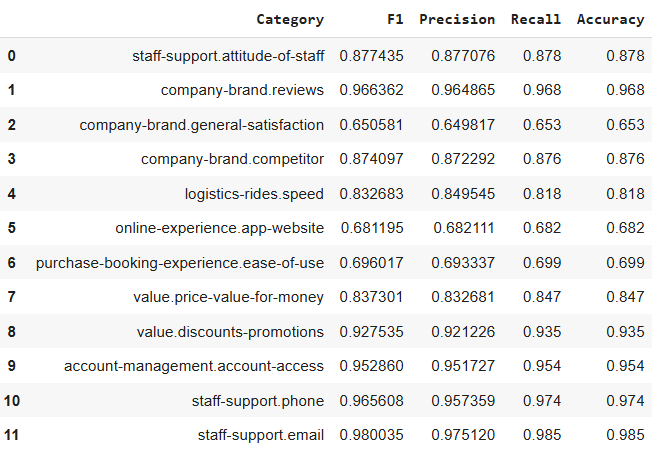

Linear Reg Version WORKING

In [65]:
import pandas as pd
from pyspark.sql.functions import col, udf
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

sentiment_results = {}

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create a combined label with 3 classes: -1, 0, 1
    @udf(returnType="double")
    def combine_sentiment(negative, neutral, positive):
        if negative == 1:
            return 0.0  # Class 0 = negative
        elif neutral == 1:
            return 1.0  # Class 1 = neutral
        elif positive == 1:
            return 2.0  # Class 2 = positive
        else:
            return 1.0  # Default to neutral if no sentiment is available

    # Create multiclass label column
    train_data = train_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    test_data = test_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    # Use TF-IDF features for prediction
    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data).select("features", "sentiment_label")
    test_assembled = assembler.transform(test_data).select("features", "sentiment_label")

    # Train multiclass classifier - LogisticRegression, reducing the number of iterations (on purpose)
    #lr = LogisticRegression(featuresCol="features", labelCol="sentiment_label", maxIter=20)
    lr = LogisticRegression(featuresCol="features", labelCol="sentiment_label", maxIter=5)
    lr_model = lr.fit(train_assembled)

    # Make predictions
    predictions = lr_model.transform(test_assembled)

    # Evaluate
    evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_label", predictionCol="prediction", metricName="f1")
    f1 = evaluator.evaluate(predictions)
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

    sentiment_results[category] = {
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy
    }

# Convert results to Pandas DataFrame
df_results = pd.DataFrame.from_dict(sentiment_results, orient="index").reset_index()
df_results.columns = ["Category", "F1", "Precision", "Recall", "Accuracy"]

# Display the table in Colab
from IPython.display import display
display(df_results)


,Category,F1,Precision,Recall,Accuracy
0,staff-support.attitude-of-staff,0.877435,0.877076,0.878,0.878
1,company-brand.reviews,0.966362,0.964865,0.968,0.968
2,company-brand.general-satisfaction,0.650581,0.649817,0.653,0.653
3,company-brand.competitor,0.874097,0.872292,0.876,0.876
4,logistics-rides.speed,0.832683,0.849545,0.818,0.818
5,online-experience.app-website,0.681195,0.682111,0.682,0.682
6,purchase-booking-experience.ease-of-use,0.696017,0.693337,0.699,0.699
7,value.price-value-for-money,0.837301,0.832681,0.847,0.847
8,value.discounts-promotions,0.927535,0.921226,0.935,0.935
9,account-management.account-access,0.952860,0.951727,0.954,0.954


In [ ]:
from matplotlib import pyplot as plt
df_results['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title F1 vs Precision

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='F1', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create a combined label with 3 classes: -1, 0, 1
    # We'll use a UDF to convert the 3 binary columns into a single multiclass label
    @udf(returnType="double")
    def combine_sentiment(negative, neutral, positive):
        if negative == 1:
            return 0.0  # Class 0 = negative
        elif neutral == 1:
            return 1.0  # Class 1 = neutral
        elif positive == 1:
            return 2.0  # Class 2 = positive
        else:
            return 1.0  # Default to neutral if no sentiment is available

    # Create multiclass label column
    train_data = train_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    test_data = test_tfidf.withColumn(
        "sentiment_label",
        combine_sentiment(
            col(f"{clean_cat}_negative"),
            col(f"{clean_cat}_neutral"),
            col(f"{clean_cat}_positive")
        )
    )

    # Use TF-IDF features for prediction
    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data).select("features", "sentiment_label")
    test_assembled = assembler.transform(test_data).select("features", "sentiment_label")

    # Train multiclass classifier - LogisticRegression for 3 classes
    lr = LogisticRegression(featuresCol="features", labelCol="sentiment_label", maxIter=10)
    lr_model = lr.fit(train_assembled)

    # Make predictions
    predictions = lr_model.transform(test_assembled)

    # Evaluate
    evaluator = MulticlassClassificationEvaluator(labelCol="sentiment_label", predictionCol="prediction", metricName="f1")
    f1 = evaluator.evaluate(predictions)
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

    sentiment_results[category] = {
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "accuracy": accuracy
    }

# Generate HTML table
html_table = "<table><tr><th>Category</th><th>F1</th><th>Precision</th><th>Recall</th><th>Accuracy</th></tr>"
for category, metrics in sentiment_results.items():
    html_table += f"<tr><td>{category}</td><td>{metrics['f1']:.4f}</td><td>{metrics['precision']:.4f}</td><td>{metrics['recall']:.4f}</td><td>{metrics['accuracy']:.4f}</td></tr>"
html_table += "</table>"

print(html_table)
    #print(f"Category: {category}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")

 **Evaluate the model -  Accuracy** - SPLIT THIS LATER

We send the predictions to the evaluator and get an accuracy score.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load pre-trained ABSA model
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def classify_aspect_sentiment(text, aspect):
    aspect_text = f"{aspect}: {text}"
    tokens = tokenizer(aspect_text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**tokens)
    scores = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze()
    sentiment = torch.argmax(scores).item() - 1  # Convert label to (-1, 0, 1)
    return sentiment

# Define aspects
#all_categories = ["blah", "customer service", "website"]

# dataset
reviews = [
    "The battery life is amazing, but the camera quality is poor.",
    "Customer service was unhelpful and rude.",
    "The website is easy to navigate and very user-friendly."
]

# Apply aspect-based sentiment classification
results = []
for review in reviews:
    aspect_results = {"Review": review}
    for category in all_categories:
        sentiment = classify_aspect_sentiment(review, category)
        aspect_results[category] = sentiment
    results.append(aspect_results)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

**Deep learning model for sentiment analysis**:

In [ ]:
# Step 6: Prepare data for deep learning models
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert to pandas for easier processing
train_pandas = dfs_train_with_sentiment.toPandas()
test_pandas = dfs_test_with_sentiment.toPandas()
validation_pandas = dfs_validation_with_sentiment.toPandas()

# Tokenize text
keras_tokenizer = KerasTokenizer(num_words=10000)
keras_tokenizer.fit_on_texts(train_pandas['text'])

# Convert text to sequences
train_sequences = keras_tokenizer.texts_to_sequences(train_pandas['text'])
test_sequences = keras_tokenizer.texts_to_sequences(test_pandas['text'])
validation_sequences = keras_tokenizer.texts_to_sequences(validation_pandas['text'])

# Pad sequences
max_seq_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data = pad_sequences(test_sequences, maxlen=max_seq_length)
validation_data = pad_sequences(validation_sequences, maxlen=max_seq_length)

# Deep learning model results
dl_sentiment_results = {}

# For each category, train a deep learning model
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Create y labels
    # 0: negative, 1: neutral, 2: positive
    def create_sentiment_labels(df, category_col):
        neg_col = f"{category_col}_negative"
        neu_col = f"{category_col}_neutral"
        pos_col = f"{category_col}_positive"

        y = np.zeros(len(df))
        y[df[neg_col] == 1] = 0
        y[df[neu_col] == 1] = 1
        y[df[pos_col] == 1] = 2
        # Default to neutral if no sentiment is available
        y[(df[neg_col] == 0) & (df[neu_col] == 0) & (df[pos_col] == 0)] = 1

        return y

    y_train = create_sentiment_labels(train_pandas, clean_cat)
    y_test = create_sentiment_labels(test_pandas, clean_cat)
    y_val = create_sentiment_labels(validation_pandas, clean_cat)

    # Convert to one-hot encoding
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, 3)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, 3)
    y_val_one_hot = tf.keras.utils.to_categorical(y_val, 3)

    # Build CNN model
    vocab_size = min(10000, len(keras_tokenizer.word_index) + 1)
    embedding_dim = 100

    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))  # 3 classes: negative, neutral, positive

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train with early stopping
    from tensorflow.keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(
        train_data, y_train_one_hot,
        validation_data=(validation_data, y_val_one_hot),
        epochs=10,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Evaluate
    y_pred_probs = model.predict(test_data)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    dl_sentiment_results[category] = {
        "accuracy": accuracy,
        "f1_neg": report['0']['f1-score'] if '0' in report else 0,
        "f1_neu": report['1']['f1-score'] if '1' in report else 0,
        "f1_pos": report['2']['f1-score'] if '2' in report else 0,
        "f1_weighted": report['weighted avg']['f1-score']
    }

    print(f"Category: {category}, Accuracy: {accuracy:.4f}, F1 (weighted): {report['weighted avg']['f1-score']:.4f}")
    print(f"F1 Scores - Negative: {report['0']['f1-score'] if '0' in report else 0:.4f}, " +
          f"Neutral: {report['1']['f1-score'] if '1' in report else 0:.4f}, " +
          f"Positive: {report['2']['f1-score'] if '2' in report else 0:.4f}")

    # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'Confusion Matrix - {category}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{clean_cat}.png', dpi=300)
    plt.show()

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Model Accuracy - {category}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
# Step 8: Perform cross-category sentiment analysis
def analyze_cross_category_sentiment_correlation(df, all_categories):
    """Analyze correlation between sentiment predictions across different categories"""
    # Create a dataframe with sentiment scores for each category
    sentiment_scores = {}

    for category in all_categories:
        clean_cat = category.replace('-', '_').replace('.', '_')
        neg_col = f"{clean_cat}_negative"
        neu_col = f"{clean_cat}_neutral"
        pos_col = f"{clean_cat}_positive"

        # If the columns exist, calculate a simple sentiment score
        if neg_col in df.columns and neu_col in df.columns and pos_col in df.columns:
            # Convert to numeric sentiment score: -1 for negative, 0 for neutral, 1 for positive
            df[f"{clean_cat}_score"] = df[pos_col].astype(int) - df[neg_col].astype(int)
            sentiment_scores[category] = f"{clean_cat}_score"

    # Create correlation matrix
    score_columns = list(sentiment_scores.values())
    if len(score_columns) > 1:
        correlation_matrix = df[score_columns].corr()

        # Plot heatmap
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                    mask=mask, vmin=-1, vmax=1, center=0,
                    xticklabels=sentiment_scores.keys(),
                    yticklabels=sentiment_scores.keys())
        plt.title('Cross-Category Sentiment Correlation', fontsize=16)
        plt.tight_layout()
        plt.savefig('sentiment_correlation_heatmap.png', dpi=300)
        plt.show()

        return correlation_matrix
    return None

# Analyze cross-category correlations
correlation_matrix = analyze_cross_category_sentiment_correlation(train_pandas, all_categories)

# Step 9: Error analysis
def perform_error_analysis(model, tokenizer, texts, true_labels, category, label_names=['Negative', 'Neutral', 'Positive']):
    """Perform error analysis on incorrect predictions"""
    # Make predictions
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    predictions = model.predict(padded_sequences)
    pred_labels = np.argmax(predictions, axis=1)

    # Find incorrect predictions
    incorrect_indices = np.where(pred_labels != true_labels)[0]

    if len(incorrect_indices) == 0:
        print(f"No incorrect predictions found for {category}")
        return

    # Sample up to 10 incorrect predictions
    sample_size = min(10, len(incorrect_indices))
    sample_indices = np.random.choice(incorrect_indices, size=sample_size, replace=False)

    # Create a dataframe for analysis
    error_df = pd.DataFrame({
        'Text': [texts[i] for i in sample_indices],
        'True Label': [label_names[true_labels[i]] for i in sample_indices],
        'Predicted Label': [label_names[pred_labels[i]] for i in sample_indices],
        'Confidence': [np.max(predictions[i]) for i in sample_indices]
    })

    # Create and plot confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.title(f'Confusion Matrix for {category}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{category}.png', dpi=300)
    plt.show()

    # Print error analysis
    print(f"\n--- Error Analysis for {category} ---")
    print(f"Total samples: {len(texts)}")
    print(f"Incorrect predictions: {len(incorrect_indices)} ({len(incorrect_indices)/len(texts)*100:.2f}%)")
    print("\nSample of incorrect predictions:")
    print(error_df)

    return error_df

# Perform error analysis for a few selected categories
selected_categories = all_categories[:3]  # Choose first 3 categories for analysis
for category in selected_categories:
    # Get test data for this category
    # Note: You would need to extract test data for each category
    # This is a placeholder - adapt to your data structure
    test_texts = test_texts_by_category.get(category, [])
    test_labels = test_labels_by_category.get(category, [])

    if len(test_texts) > 0:
        perform_error_analysis(model, keras_tokenizer, test_texts, test_labels, category)

# Step 10: Analyze prediction confidence
def analyze_prediction_confidence(model, tokenizer, texts, true_labels, category):
    """Analyze prediction confidence and its relationship with accuracy"""
    # Make predictions
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    predictions = model.predict(padded_sequences)
    pred_labels = np.argmax(predictions, axis=1)

    # Get confidence of predictions (max probability)
    confidences = np.max(predictions, axis=1)

    # Create a dataframe
    confidence_df = pd.DataFrame({
        'Confidence': confidences,
        'Correct': pred_labels == true_labels
    })

    # Plot confidence distribution
    plt.figure(figsize=(12, 8))

    # Overall confidence distribution
    plt.subplot(2, 2, 1)
    sns.histplot(confidences, bins=20, kde=True)
    plt.title(f'Prediction Confidence Distribution - {category}')
    plt.xlabel('Confidence')
    plt.ylabel('Count')

    # Confidence by correctness
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Correct', y='Confidence', data=confidence_df)
    plt.title('Confidence by Prediction Correctness')
    plt.xlabel('Prediction Correct')
    plt.ylabel('Confidence')

    # Accuracy by confidence bucket
    plt.subplot(2, 2, 3)
    confidence_df['ConfidenceBucket'] = pd.cut(confidence_df['Confidence'], bins=10)
    accuracy_by_bucket = confidence_df.groupby('ConfidenceBucket')['Correct'].mean()

    sns.barplot(x=accuracy_by_bucket.index.astype(str), y=accuracy_by_bucket.values)
    plt.title('Accuracy by Confidence Range')
    plt.xlabel('Confidence Range')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Count by confidence bucket
    plt.subplot(2, 2, 4)
    count_by_bucket = confidence_df.groupby('ConfidenceBucket').size()
    sns.barplot(x=count_by_bucket.index.astype(str), y=count_by_bucket.values)
    plt.title('Sample Count by Confidence Range')
    plt.xlabel('Confidence Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig(f'confidence_analysis_{category}.png', dpi=300)
    plt.show()

    return confidence_df

# Analyze prediction confidence for selected categories
for category in selected_categories:
    test_texts = test_texts_by_category.get(category, [])
    test_labels = test_labels_by_category.get(category, [])

    if len(test_texts) > 0:
        analyze_prediction_confidence(model, keras_tokenizer, test_texts, test_labels, category)

# Step 11: Text length vs accuracy analysis
def analyze_text_length_vs_accuracy(model, tokenizer, texts, true_labels, category):
    """Analyze the relationship between text length and prediction accuracy"""
    # Make predictions
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
    predictions = model.predict(padded_sequences)
    pred_labels = np.argmax(predictions, axis=1)

    # Calculate text lengths
    text_lengths = [len(text.split()) for text in texts]

    # Create dataframe
    length_df = pd.DataFrame({
        'TextLength': text_lengths,
        'Correct': pred_labels == true_labels
    })

    # Create length buckets
    length_df['LengthBucket'] = pd.cut(length_df['TextLength'], bins=10)

    # Calculate accuracy by length bucket
    accuracy_by_length = length_df.groupby('LengthBucket')['Correct'].mean()
    count_by_length = length_df.groupby('LengthBucket').size()

    # Plot
    plt.figure(figsize=(12, 8))

    # Text length distribution
    plt.subplot(2, 2, 1)
    sns.histplot(text_lengths, bins=20, kde=True)
    plt.title(f'Text Length Distribution - {category}')
    plt.xlabel('Text Length (words)')
    plt.ylabel('Count')

    # Text length vs accuracy (scatter)
    plt.subplot(2, 2, 2)
    sns.scatterplot(x='TextLength', y='Correct', data=length_df, alpha=0.3)
    plt.title('Text Length vs Prediction Correctness')
    plt.xlabel('Text Length (words)')
    plt.ylabel('Prediction Correct')

    # Accuracy by length bucket
    plt.subplot(2, 2, 3)
    sns.barplot(x=accuracy_by_length.index.astype(str), y=accuracy_by_length.values)
    plt.title('Accuracy by Text Length Range')
    plt.xlabel('Text Length Range')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Count by length bucket
    plt.subplot(2, 2, 4)
    sns.barplot(x=count_by_length.index.astype(str), y=count_by_length.values)
    plt.title('Sample Count by Text Length Range')
    plt.xlabel('Text Length Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig(f'length_analysis_{category}.png', dpi=300)
    plt.show()

    return length_df

# Analyze text length vs accuracy for selected categories
for category in selected_categories:
    test_texts = test_texts_by_category.get(category, [])
    test_labels = test_labels_by_category.get(category, [])

    if len(test_texts) > 0:
        analyze_text_length_vs_accuracy(model, keras_tokenizer, test_texts, test_labels, category)

# Step 12: Create interactive dashboard (optional - if using in a Jupyter notebook)
# Note: This requires ipywidgets and is best used in a Jupyter environment
try:
    import ipywidgets as widgets
    from IPython.display import display

    # Create category selector
    category_dropdown = widgets.Dropdown(
        options=all_categories,
        description='Category:',
        disabled=False,
    )

    # Create visualization type selector
    viz_dropdown = widgets.Dropdown(
        options=['Performance Metrics', 'Confusion Matrix', 'Important Words', 'Error Examples'],
        description='Visualization:',
        disabled=False,
    )

    # Function to update visualization based on selections
    def update_visualization(category, viz_type):
        if viz_type == 'Performance Metrics':
            # Display performance metrics for selected category
            if category in dl_sentiment_results:
                metrics = dl_sentiment_results[category]
                print(f"Performance metrics for {category}:")
                for metric, value in metrics.items():
                    print(f"  {metric}: {value:.4f}")

        elif viz_type == 'Confusion Matrix':
            # Display confusion matrix for selected category
            test_texts = test_texts_by_category.get(category, [])
            test_labels = test_labels_by_category.get(category, [])

            if len(test_texts) > 0:
                # Make predictions
                sequences = keras_tokenizer.texts_to_sequences(test_texts)
                padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
                predictions = model.predict(padded_sequences)
                pred_labels = np.argmax(predictions, axis=1)

                # Create and plot confusion matrix
                cm = confusion_matrix(test_labels, pred_labels)
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=['Negative', 'Neutral', 'Positive'],
                            yticklabels=['Negative', 'Neutral', 'Positive'])
                plt.title(f'Confusion Matrix for {category}')
                plt.xlabel('Predicted Label')
                plt.ylabel('True Label')
                plt.show()

        elif viz_type == 'Important Words':
            # Display important words for each sentiment
            for sentiment_class in range(3):
                visualize_important_words_for_sentiment(model, keras_tokenizer, category, sentiment_class)

        elif viz_type == 'Error Examples':
            # Display error examples
            test_texts = test_texts_by_category.get(category, [])
            test_labels = test_labels_by_category.get(category, [])

            if len(test_texts) > 0:
                perform_error_analysis(model, keras_tokenizer, test_texts, test_labels, category)

    # Create interactive output
    interactive_output = widgets.interactive_output(
        update_visualization,
        {'category': category_dropdown, 'viz_type': viz_dropdown}
    )

    # Display widgets
    display(widgets.HBox([category_dropdown, viz_dropdown]))
    display(interactive_output)

except ImportError:
    print("Interactive visualizations require ipywidgets. Install with: pip install ipywidgets")

# Step 13: Save model results summary to file
def save_results_summary(ml_results, dl_results, filename='sentiment_analysis_results.csv'):
    """Save a summary of results to CSV file"""
    results_data = []

    # Combine results from both models
    for category in all_categories:
        row = {'Category': category}

        # Add ML results if available
        if category in ml_results:
            for metric, value in ml_results[category].items():
                row[f'ML_{metric}'] = value

        # Add DL results if available
        if category in dl_results:
            for metric, value in dl_results[category].items():
                row[f'DL_{metric}'] = value

        results_data.append(row)

    # Convert to DataFrame and save
    results_df = pd.DataFrame(results_data)
    results_df.to_csv(filename, index=False)

#**LLM Version - Using RoBERTa LLM model for ACD - better than BERT at text**




In [71]:
import pandas as pd
import numpy as np
import ast
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Custom dataset class for multi-label classification
class AspectCategoryDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        # Remove batch dimension added by tokenizer
        encoding = {k: v.squeeze(0) for k, v in encoding.items()}

        # Add label
        encoding['labels'] = torch.tensor(label, dtype=torch.float)

        return encoding

# Preprocessing function to prepare data
def preprocess_data(df, label_codes_col='label_codes'):
    # Extract categories from label codes
    def extract_categories(label_codes):
        if isinstance(label_codes, str):
            codes = ast.literal_eval(label_codes)
            # Extract category part (remove the sentiment indicator)
            categories = [code.rsplit('.', 1)[0] for code in codes]
            return categories
        return []

    # Apply the function to create a categories column
    df['categories'] = df[label_codes_col].apply(extract_categories)

    # Get all unique categories
    all_categories = []
    for cats in df['categories']:
        all_categories.extend(cats)
    all_categories = sorted(list(set(all_categories)))

    # Create binary labels for each category
    for category in all_categories:
        col_name = f"has_{category.replace('-', '_').replace('.', '_')}"
        df[col_name] = df['categories'].apply(lambda x: 1 if category in x else 0)

    # Return DataFrame and list of categories
    return df, all_categories

# Function to train the model
def train_roberta_model(train_loader, val_loader, num_labels, epochs=3):
    # Load pre-trained RoBERTa model
    model = RobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=num_labels,
        problem_type="multi_label_classification"
    )
    model.to(device)

    # Set up optimizer
    optimizer = AdamW(model.parameters(), lr=2e-5)

    # Calculate total training steps
    total_steps = len(train_loader) * epochs

    # Create learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    # Training loop
    best_f1 = 0.0
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")

        # Training phase
        model.train()
        train_loss = 0
        progress_bar = tqdm(train_loader, desc="Training")

        for batch in progress_bar:
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}

            # Clear gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            # Backward pass
            loss.backward()

            # Update weights
            optimizer.step()
            scheduler.step()

            # Update loss
            train_loss += loss.item()
            progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average training loss: {avg_train_loss:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0
        all_labels = []
        all_preds = []

        with torch.no_grad():
            progress_bar = tqdm(val_loader, desc="Validation")
            for batch in progress_bar:
                batch = {k: v.to(device) for k, v in batch.items()}

                outputs = model(**batch)
                loss = outputs.loss
                logits = outputs.logits

                val_loss += loss.item()

                # Convert logits to predictions (apply sigmoid and threshold)
                preds = torch.sigmoid(logits).cpu().numpy()
                labels = batch['labels'].cpu().numpy()

                all_labels.append(labels)
                all_preds.append(preds)

        # Concatenate all batches
        all_labels = np.vstack(all_labels)
        all_preds = np.vstack(all_preds)

        # Convert predictions to binary (threshold 0.5)
        all_preds_binary = (all_preds > 0.5).astype(int)

        # Calculate metrics
        avg_val_loss = val_loss / len(val_loader)
        precision, recall, f1, _ = precision_recall_fscore_support(
            all_labels, all_preds_binary, average='micro')

        print(f"Validation Loss: {avg_val_loss:.4f}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

        # Save best model
        if f1 > best_f1:
            best_f1 = f1
            torch.save(model.state_dict(), 'roberta_acd_best_model.pt')
            print("Saved best model!")

    return model

# Function to evaluate on test set
def evaluate_model(model, test_loader, category_names):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            batch = {k: v.to(device) for k, v in batch.items()}

            outputs = model(**batch)
            logits = outputs.logits

            # Convert logits to predictions
            preds = torch.sigmoid(logits).cpu().numpy()
            labels = batch['labels'].cpu().numpy()

            all_labels.append(labels)
            all_preds.append(preds)

    # Concatenate all batches
    all_labels = np.vstack(all_labels)
    all_preds = np.vstack(all_preds)

    # Convert predictions to binary
    all_preds_binary = (all_preds > 0.5).astype(int)

    # Calculate overall metrics
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds_binary, average='micro')

    print(f"Overall - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Calculate per-category metrics
    results = []
    for i, category in enumerate(category_names):
        cat_precision, cat_recall, cat_f1, _ = precision_recall_fscore_support(
            all_labels[:, i], all_preds_binary[:, i], average='binary')

        results.append({
            'category': category,
            'precision': cat_precision,
            'recall': cat_recall,
            'f1': cat_f1
        })

    # Create DataFrame with results
    results_df = pd.DataFrame(results)
    return results_df, precision, recall, f1

#
def roberta():
    # Load data (spark DataFrame converted to pandas)
    # df = pd.read_csv("export_45.csv")

    # Preprocess data
    print("Preprocessing data...")
    df_processed, all_categories = preprocess_data(df)

    # Create column names for binary features
    binary_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]

    # Split data
    X = df_processed['text'].values
    y = df_processed[binary_cols].values

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Train: {len(X_train)} samples")
    print(f"Validation: {len(X_val)} samples")
    print(f"Test: {len(X_test)} samples")

    # Initialize tokenizer
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

    # Create datasets
    train_dataset = AspectCategoryDataset(X_train, y_train, tokenizer)
    val_dataset = AspectCategoryDataset(X_val, y_val, tokenizer)
    test_dataset = AspectCategoryDataset(X_test, y_test, tokenizer)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Train model
    print("\nTraining RoBERTa model...")
    model = train_roberta_model(train_loader, val_loader, num_labels=len(all_categories), epochs=3)

    # Load best model for evaluation
    best_model = RobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=len(all_categories),
        problem_type="multi_label_classification"
    )
    best_model.load_state_dict(torch.load('roberta_acd_best_model.pt'))
    best_model.to(device)

    # Evaluate on test set
    print("\nEvaluating on test set...")
    results_df, precision, recall, f1 = evaluate_model(best_model, test_loader, all_categories)

    # Display results
    print("\nPer-category results:")
    print(results_df.sort_values('f1', ascending=False).head(10))

    print(f"\nOverall Results - Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    return results_df, precision, recall, f1, best_model

roberta()


Using device: cpu
Preprocessing data...


NameError: name 'df' is not defined

# **ACSA ANALYSIS**

In [70]:
# Import necessary libraries
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers.optimization import AdamW, get_linear_schedule_with_warmup
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define a custom dataset class for our data
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        encoding = self.tokenizer.encode_plus(
            self.texts[item],
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
            return_token_type_ids=False,
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[item])
        }

# Load pre-trained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(all_categories))

# Prepare data for RoBERTa model
roberta_dataset = TextDataset(train_texts, train_labels, tokenizer, max_seq_length)
roberta_test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_seq_length)

# Create data loaders
batch_size = 16
roberta_train_dataloader = DataLoader(roberta_dataset, batch_size=batch_size, shuffle=True)
roberta_test_dataloader = DataLoader(roberta_test_dataset, batch_size=batch_size)

# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(roberta_train_dataloader))

# Train RoBERTa model
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in roberta_train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {total_loss / len(roberta_train_dataloader)}')

# Evaluate RoBERTa model
model.eval()
roberta_predictions = []
with torch.no_grad():
    for batch in roberta_test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.sigmoid(logits)

        roberta_predictions.extend(torch.round(torch.sigmoid(logits)).cpu().numpy())

# Calculate metrics for RoBERTa
roberta_results = {}
for i, category in enumerate(all_categories):
    f1 = f1_score(test_labels[:, i], [pred[i] for pred in roberta_predictions])
    report = classification_report(test_labels[:, i], [pred[i] for pred in roberta_predictions], output_dict=True)
    roberta_results[category] = {
        "f1": f1,
        "precision": report['1']['precision'] if 1 in report else 0,
        "recall": report['1']['recall'] if 1 in report else 0
    }
    print(f"RoBERTa - Category: {category}, F1: {f1}")

# Update plot_model_comparison function to include RoBERTa results
def plot_model_comparison(svm_results, cnn_results, lstm_results, roberta_results, all_categories):
    categories = [cat.replace('-', '_').replace('.', '_') for cat in all_categories]
    svm_f1 = [svm_results[cat]['f1'] for cat in all_categories]
    cnn_f1 = [cnn_results[cat]['f1'] for cat in all_categories]
    lstm_f1 = [lstm_results[cat]['f1'] for cat in all_categories]
    roberta_f1 = [roberta_results[cat]['f1'] for cat in all_categories]

    avg_f1 = [(svm_f1[i] + cnn_f1[i] + lstm_f1[i] + roberta_f1[i])/4 for i in range(len(all_categories))]
    indices = np.argsort(avg_f1)[::-1]

    categories = [categories[i] for i in indices]
    svm_f1 = [svm_f1[i] for i in indices]
    cnn_f1 = [cnn_f1[i] for i in indices]
    lstm_f1 = [lstm_f1[i] for i in indices]
    roberta_f1 = [roberta_f1[i] for i in indices]

    x = np.arange(len(categories))
    width = 0.2

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x - width, svm_f1, width, label='SVM', color='#4e79a7')
    ax.bar(x, cnn_f1, width, label='CNN', color='#f28e2b')
    ax.bar(x + width, lstm_f1, width, label='LSTM', color='#59a14f')
    ax.bar(x + 2*width, roberta_f1, width, label='RoBERTa', color='#e15759')

    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('F1 Score', fontsize=12)
    ax.set_title('Model Performance Comparison by Category', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=60, ha='right')
    ax.set_ylim(0, 1.0)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300)
    plt.show()

# Update plot_model_comparison function call
plot_model_comparison(svm_results, cnn_results, lstm_results, roberta_results, all_categories)
roberta_dataset = TextDataset(train_texts, train_labels, tokenizer, max_seq_length)
roberta_test_dataset = TextDataset(test_texts, test_labels, tokenizer, max_seq_length)

# Create data loaders
batch_size = 16
roberta_train_dataloader = DataLoader(roberta_dataset, batch_size=batch_size, shuffle=True)
roberta_test_dataloader = DataLoader(roberta_test_dataset, batch_size=batch_size)

# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(roberta_train_dataloader))

# Train RoBERTa model
for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in roberta_train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {total_loss / len(roberta_train_dataloader)}')

# Evaluate RoBERTa model
model.eval()
roberta_predictions = []
with torch.no_grad():
    for batch in roberta_test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.sigmoid(logits)

        roberta_predictions.extend(torch.round(torch.sigmoid(logits)).cpu().numpy())

# Calculate metrics for RoBERTa
roberta_results = {}
for i, category in enumerate(all_categories):
    f1 = f1_score(test_labels[:, i], roberta_predictions[:, i])
    report = classification_report(test_labels[:, i], roberta_predictions[:, i], output_dict=True)
    roberta_results[category] = {
        "f1": f1,
        "precision": report['1']['precision'] if 1 in report else 0,
        "recall": report['1']['recall'] if 1 in report else 0
    }
    print(f"RoBERTa - Category: {category}, F1: {f1}")

# Update plot_model_comparison function to include RoBERTa results
def plot_model_comparison(svm_results, cnn_results, lstm_results, roberta_results, all_categories):
    categories = [cat.replace('-', '_').replace('.', '_') for cat in all_categories]
    svm_f1 = [svm_results[cat]['f1'] for cat in all_categories]
    cnn_f1 = [cnn_results[cat]['f1'] for cat in all_categories]
    lstm_f1 = [lstm_results[cat]['f1'] for cat in all_categories]
    roberta_f1 = [roberta_results[cat]['f1'] for cat in all_categories]

    avg_f1 = [(svm_f1[i] + cnn_f1[i] + lstm_f1[i] + roberta_f1[i])/4 for i in range(len(all_categories))]
    indices = np.argsort(avg_f1)[::-1]

    categories = [categories[i] for i in indices]
    svm_f1 = [svm_f1[i] for i in indices]
    cnn_f1 = [cnn_f1[i] for i in indices]
    lstm_f1 = [lstm_f1[i] for i in indices]
    roberta_f1 = [roberta_f1[i] for i in indices]

    x = np.arange(len(categories))
    width = 0.2

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x - width, svm_f1, width, label='SVM', color='#4e79a7')
    ax.bar(x, cnn_f1, width, label='CNN', color='#f28e2b')
    ax.bar(x + width, lstm_f1, width, label='LSTM', color='#59a14f')
    ax.bar(x + 2*width, roberta_f1, width, label='RoBERTa', color='#e15759')

    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('F1 Score', fontsize=12)
    ax.set_title('Model Performance Comparison by Category', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=60, ha='right')
    ax.set_ylim(0, 1.0)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300)
    plt.show()

# Update plot_model_comparison function call
plot_model_comparison(svm_results, cnn_results, lstm_results, roberta_results, all_categories)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


NameError: name 'train_texts' is not defined

# **SVM Vs CNN Vs LSTM (Working)**




SVM - Category: staff-support.attitude-of-staff, F1: 0.8981648026442215, Precision: 0.8966377667587873, Recall: 0.8999999999999999
SVM - Category: company-brand.reviews, F1: 0.9677203938336014, Precision: 0.9651736040609137, Recall: 0.971
SVM - Category: company-brand.general-satisfaction, F1: 0.6661523809523809, Precision: 0.66659375, Recall: 0.6769999999999999
SVM - Category: company-brand.competitor, F1: 0.8884802807311581, Precision: 0.8785668878034555, Recall: 0.902
SVM - Category: logistics-rides.speed, F1: 0.8614310730294387, Precision: 0.8551839601038116, Recall: 0.87
SVM - Category: online-experience.app-website, F1: 0.7746932667101523, Precision: 0.7754421736473933, Recall: 0.776
SVM - Category: purchase-booking-experience.ease-of-use, F1: 0.7316663798542995, Precision: 0.7291313063319458, Recall: 0.736
SVM - Category: value.price-value-for-money, F1: 0.8587893006936105, Precision: 0.8532641726551125, Recall: 0.869
SVM - Category: value.discounts-promotions, F1: 0.92078004449

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_12                 │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_70 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_58 (MaxPooling1D)      │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_71 (Conv1D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_12              │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.1024 - loss: 0.5355 - val_accuracy: 0.2860 - val_loss: 0.3405
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.2637 - loss: 0.3540 - val_accuracy: 0.2860 - val_loss: 0.3461
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.2718 - loss: 0.3467 - val_accuracy: 0.2860 - val_loss: 0.3406
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2933 - loss: 0.3462 - val_accuracy: 0.2860 - val_loss: 0.3307
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3193 - loss: 0.3235 - val_accuracy: 0.4180 - val_loss: 0.3157
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4094 - loss: 0.3070 - val_accuracy: 0.4370 - val_loss: 0.3060
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4818 - loss: 0.2768 - val_accuracy: 0.4370 - val_loss: 0.2969
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.4913 - loss: 0.2627 - val_accuracy: 0.4

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_13                 │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 364ms/step - accuracy: 0.2519 - loss: 0.5568 - val_accuracy: 0.2860 - val_loss: 0.3465
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 339ms/step - accuracy: 0.2701 - loss: 0.3543 - val_accuracy: 0.2860 - val_loss: 0.3382
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 587ms/step - accuracy: 0.3039 - loss: 0.3385 - val_accuracy: 0.3870 - val_loss: 0.3303
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 547ms/step - accuracy: 0.2895 - loss: 0.3333 - val_accuracy: 0.2930 - val_loss: 0.3281
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.3173 - loss: 0.3283 - val_accuracy: 0.3740 - val_loss: 0.3227
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 544ms/step - accuracy: 0.3337 - loss: 0.3120 - val_accuracy: 0.3630 - val_loss: 0.3163
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 536ms/step - accuracy: 0.4165 - loss: 0.2996 - val_accuracy: 0.3660 - val_loss: 0.3097
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 622ms/step - accuracy: 0.5137 - loss: 0.2700 - val

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

LSTM - Category: logistics-rides.speed, F1: 0.06504065040650407
LSTM - Category: online-experience.app-website, F1: 0.7529880478087649
LSTM - Category: purchase-booking-experience.ease-of-use, F1: 0.5333333333333333
LSTM - Category: value.price-value-for-money, F1: 0.13836477987421383
LSTM - Category: value.discounts-promotions, F1: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

LSTM - Category: account-management.account-access, F1: 0.0
LSTM - Category: staff-support.phone, F1: 0.0
LSTM - Category: staff-support.email, F1: 0.0


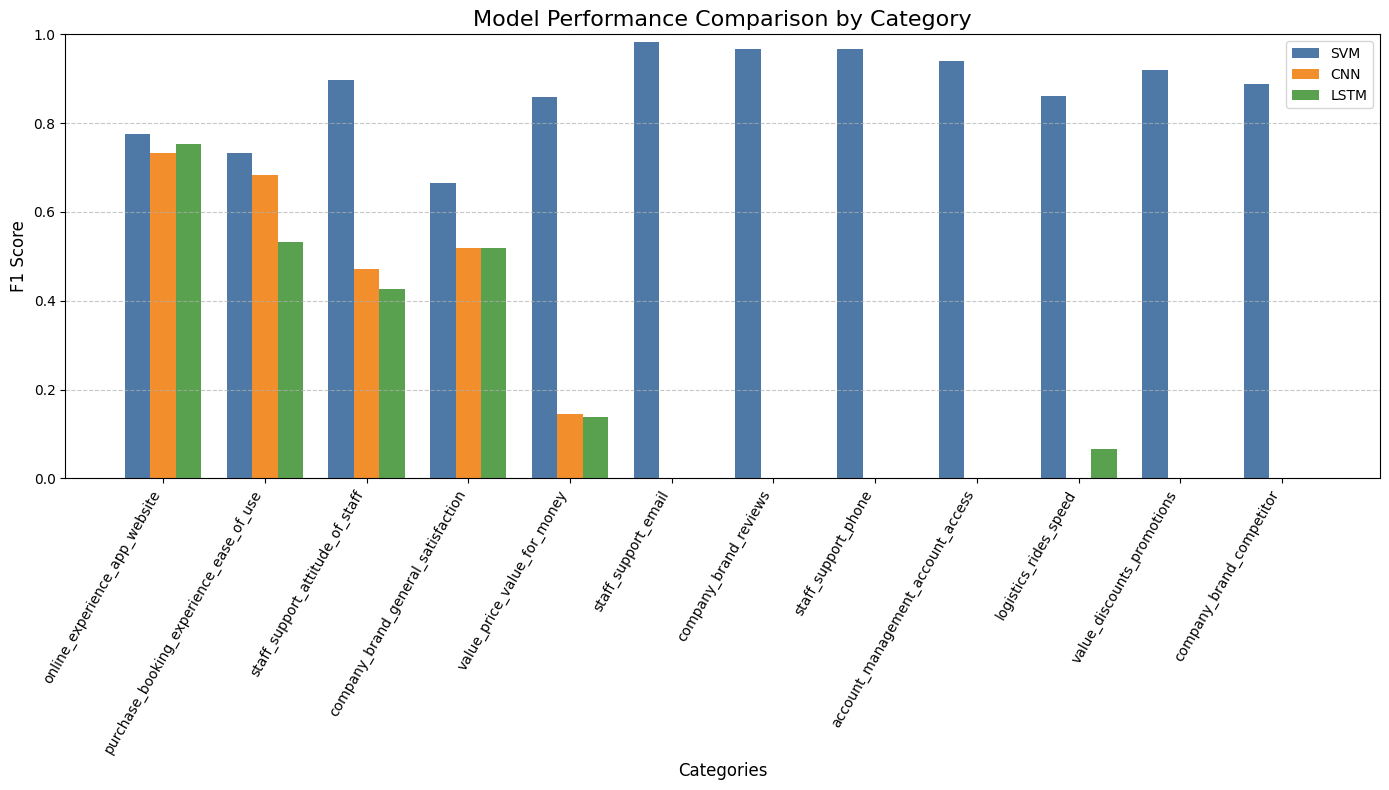

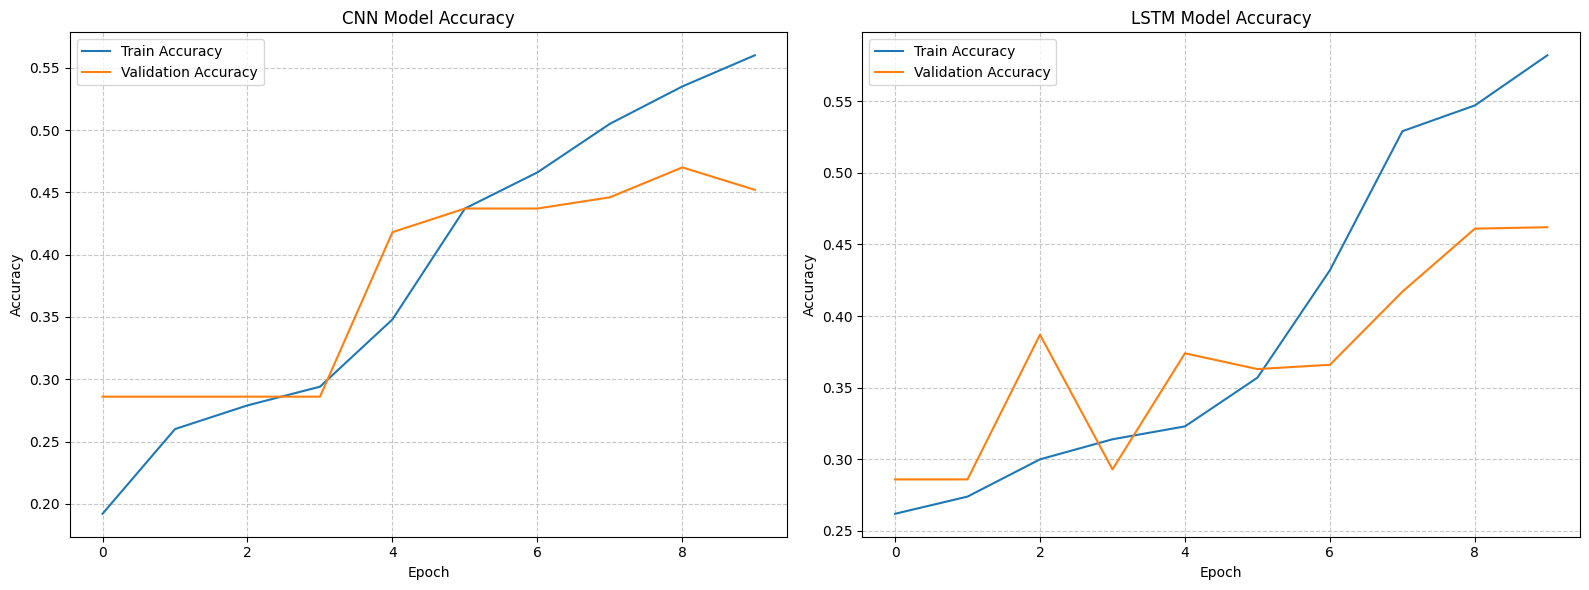

In [68]:
from pyspark.sql.functions import col, array_contains, explode, udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import VectorAssembler, HashingTF, IDF, Tokenizer
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import ast
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# Step 1: Extract and clean categories (same as before)
@udf(returnType=ArrayType(StringType()))
def extract_categories(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [code.rsplit('.', 1)[0] for code in codes]
    return []

# Apply the UDF to extract categories
dfs_train_clean = dfs_train.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_test_clean = dfs_test.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_validation_clean = dfs_validation.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)

# Step 2: Get all unique categories with consistent naming
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

# Step 3: Create binary indicator columns (same as before)
for category in all_categories:

    # replacing the hyphens, dots with underscores
    col_name = f"has_{category.replace('-', '_').replace('.', '_')}"
    dfs_train_clean = dfs_train_clean.withColumn(col_name, array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(col_name, array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(col_name, array_contains(col("categories"), category).cast("integer"))

# Cache the dataframes again.
dfs_train_clean.cache()
dfs_test_clean.cache()
dfs_validation_clean.cache()

# Step 4: TF-IDF Features for traditional ML model (SVM)
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=1000)
idf = IDF(inputCol="raw_features", outputCol="tfidf_features", minDocFreq=2)

# Apply transformations
train_tokenized = tokenizer.transform(dfs_train_clean)
test_tokenized = tokenizer.transform(dfs_test_clean)
train_hashed = hashingTF.transform(train_tokenized)
test_hashed = hashingTF.transform(test_tokenized)
idf_model = idf.fit(train_hashed)
train_tfidf = idf_model.transform(train_hashed)
test_tfidf = idf_model.transform(test_hashed)

# Step 5: Prepare data for deep learning models (CNN and LSTM)
# Convert to pandas for easier processing
train_pandas = dfs_train_clean.toPandas()
test_pandas = dfs_test_clean.toPandas()
validation_pandas = dfs_validation_clean.toPandas()

# Prepare text data for deep learning models
keras_tokenizer = KerasTokenizer(num_words=10000)
keras_tokenizer.fit_on_texts(train_pandas['text'])

# Convert text to sequences
train_sequences = keras_tokenizer.texts_to_sequences(train_pandas['text'])
test_sequences = keras_tokenizer.texts_to_sequences(test_pandas['text'])
validation_sequences = keras_tokenizer.texts_to_sequences(validation_pandas['text'])

# Pad sequences to ensure uniform length
max_seq_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data = pad_sequences(test_sequences, maxlen=max_seq_length)
validation_data = pad_sequences(validation_sequences, maxlen=max_seq_length)

# Prepare multi-label targets for deep learning
feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]
train_labels = train_pandas[feature_cols].values
test_labels = test_pandas[feature_cols].values
validation_labels = validation_pandas[feature_cols].values

# Step 6: Build and train different models

# 6.1: SVM Model for each category (similar to previous code)
svm_results = {}

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    col_name = f"has_{clean_cat}"

    # Create label column for this specific category
    train_data_svm = train_tfidf.withColumn("label", col(col_name))
    test_data_svm = test_tfidf.withColumn("label", col(col_name))

    # Use only TF-IDF features for prediction
    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data_svm).select("features", "label")
    test_assembled = assembler.transform(test_data_svm).select("features", "label")

    # Train binary classifier
    svm = LinearSVC(featuresCol="features", labelCol="label", maxIter=20, regParam=0.1)
    svm_model = svm.fit(train_assembled)

    # Make predictions
    predictions = svm_model.transform(test_assembled)

    # Evaluate
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
    f1 = evaluator.evaluate(predictions)
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

    svm_results[category] = {"f1": f1, "precision": precision, "recall": recall}
    print(f"SVM - Category: {category}, F1: {f1}, Precision: {precision}, Recall: {recall}")

# 6.2: CNN Model for multi-label classification
def build_cnn_model(vocab_size, embedding_dim, max_length, num_categories):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_categories, activation='sigmoid'))  # Sigmoid for multi-label
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build and train the CNN model
vocab_size = min(10000, len(keras_tokenizer.word_index) + 1)
embedding_dim = 100
num_categories = len(all_categories)

cnn_model = build_cnn_model(vocab_size, embedding_dim, max_seq_length, num_categories)
print(cnn_model.summary())

# Train with early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history_cnn = cnn_model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(validation_data, validation_labels),
    callbacks=[early_stopping]
)

# Evaluate CNN model
cnn_predictions = cnn_model.predict(test_data)
cnn_predictions_binary = (cnn_predictions > 0.5).astype(int)

# Calculate metrics for CNN
cnn_results = {}
for i, category in enumerate(all_categories):
    f1 = f1_score(test_labels[:, i], cnn_predictions_binary[:, i])
    report = classification_report(test_labels[:, i], cnn_predictions_binary[:, i], output_dict=True)
    cnn_results[category] = {
        "f1": f1,
        "precision": report['1']['precision'] if 1 in report else 0,
        "recall": report['1']['recall'] if 1 in report else 0
    }
    print(f"CNN - Category: {category}, F1: {f1}")

# 6.3: LSTM Model for multi-label classification
def build_lstm_model(vocab_size, embedding_dim, max_length, num_categories):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_categories, activation='sigmoid'))  # Sigmoid for multi-label
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build and train LSTM model
lstm_model = build_lstm_model(vocab_size, embedding_dim, max_seq_length, num_categories)
print(lstm_model.summary())

# Train with early stopping
history_lstm = lstm_model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(validation_data, validation_labels),
    callbacks=[early_stopping]
)

# Evaluate LSTM model
lstm_predictions = lstm_model.predict(test_data)
lstm_predictions_binary = (lstm_predictions > 0.5).astype(int)

# Calculate metrics for LSTM
lstm_results = {}
for i, category in enumerate(all_categories):
    f1 = f1_score(test_labels[:, i], lstm_predictions_binary[:, i])
    report = classification_report(test_labels[:, i], lstm_predictions_binary[:, i], output_dict=True)
    lstm_results[category] = {
        "f1": f1,
        "precision": report['1']['precision'] if 1 in report else 0,
        "recall": report['1']['recall'] if 1 in report else 0
    }
    print(f"LSTM - Category: {category}, F1: {f1}")

# Step 7: Visualize and compare model performance
def plot_model_comparison(svm_results, cnn_results, lstm_results, all_categories):
    # Prepare data
    categories = [cat.replace('-', '_').replace('.', '_') for cat in all_categories]
    svm_f1 = [svm_results[cat]['f1'] for cat in all_categories]
    cnn_f1 = [cnn_results[cat]['f1'] for cat in all_categories]
    lstm_f1 = [lstm_results[cat]['f1'] for cat in all_categories]

    # Sort by average F1 score
    avg_f1 = [(svm_f1[i] + cnn_f1[i] + lstm_f1[i])/3 for i in range(len(all_categories))]
    indices = np.argsort(avg_f1)[::-1]

    categories = [categories[i] for i in indices]
    svm_f1 = [svm_f1[i] for i in indices]
    cnn_f1 = [cnn_f1[i] for i in indices]
    lstm_f1 = [lstm_f1[i] for i in indices]

    # Plot
    x = np.arange(len(categories))
    width = 0.25

    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x - width, svm_f1, width, label='SVM', color='#4e79a7')
    ax.bar(x, cnn_f1, width, label='CNN', color='#f28e2b')
    ax.bar(x + width, lstm_f1, width, label='LSTM', color='#59a14f')

    ax.set_xlabel('Categories', fontsize=12)
    ax.set_ylabel('F1 Score', fontsize=12)
    ax.set_title('Model Performance Comparison by Category', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=60, ha='right')
    ax.set_ylim(0, 1.0)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300)
    plt.show()

# Plot training history for deep learning models
def plot_training_history(history_cnn, history_lstm):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # CNN training history
    ax1.plot(history_cnn.history['accuracy'], label='Train Accuracy')
    ax1.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('CNN Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()
    ax1.grid(linestyle='--', alpha=0.7)

    # LSTM training history
    ax2.plot(history_lstm.history['accuracy'], label='Train Accuracy')
    ax2.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('LSTM Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend()
    ax2.grid(linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300)
    plt.show()

# Execute visualization functions
plot_model_comparison(svm_results, cnn_results, lstm_results, all_categories)
plot_training_history(history_cnn, history_lstm)


INSERT ABSA

In [ ]:
# Step 1: Extract and clean categories - use a consistent naming convention
@udf(returnType=ArrayType(StringType()))
def extract_categories(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [code.rsplit('.', 1)[0] for code in codes]
    return []

# Apply the UDF to extract categories
dfs_train_clean = dfs_train.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_test_clean = dfs_test.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_validation_clean = dfs_validation.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)

# Step 2: Get all unique categories with consistent naming
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

# Step 3: Create binary indicator columns with consistent naming
for category in all_categories:
    # Use the original category name in the column name to avoid confusion
    col_name = f"has_{category.replace('-', '_').replace('.', '_')}"
    dfs_train_clean = dfs_train_clean.withColumn(col_name, array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(col_name, array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(col_name, array_contains(col("categories"), category).cast("integer"))

# Cache DataFrames
dfs_train_clean.cache()
dfs_test_clean.cache()
dfs_validation_clean.cache()
dfs_train_clean.show(10)

# Step 4: Text vectorization with TF-IDF
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=1000)
idf = IDF(inputCol="raw_features", outputCol="tfidf_features", minDocFreq=2)

# Apply transformations
train_tokenized = tokenizer.transform(dfs_train_clean)
test_tokenized = tokenizer.transform(dfs_test_clean)
train_hashed = hashingTF.transform(train_tokenized)
test_hashed = hashingTF.transform(test_tokenized)
idf_model = idf.fit(train_hashed)
train_tfidf = idf_model.transform(train_hashed)
test_tfidf = idf_model.transform(test_hashed)

# Step 5: Select the correct feature columns based on the actual column names
feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]

# Step 6: Build a multi-label classifier for each category
# For each category, train a separate binary classifier
results = {}

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    col_name = f"has_{clean_cat}"

    # Create label column for this specific category
    train_data = train_tfidf.withColumn("label", col(col_name))
    test_data = test_tfidf.withColumn("label", col(col_name))

    # Use only TF-IDF features for prediction
    assembler = VectorAssembler(inputCols=["tfidf_features"], outputCol="features")
    train_assembled = assembler.transform(train_data).select("features", "label")
    test_assembled = assembler.transform(test_data).select("features", "label")

    # Train binary classifier
    svm = LinearSVC(featuresCol="features", labelCol="label", maxIter=20, regParam=0.1)
    svm_model = svm.fit(train_assembled)

    # Make predictions
    predictions = svm_model.transform(test_assembled)

    # Evaluate
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
    f1 = evaluator.evaluate(predictions)
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

    results[category] = {"f1": f1, "precision": precision, "recall": recall}
    print(f"Category: {category}, F1: {f1}, Precision: {precision}, Recall: {recall}")

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'results' is the dictionary containing performance metrics
categories = list(results.keys())
f1_scores = [results[cat]['f1'] for cat in categories]
precision_scores = [results[cat]['precision'] for cat in categories]
recall_scores = [results[cat]['recall'] for cat in categories]

# Create a DataFrame for easy plotting
df = pd.DataFrame({
    'Category': categories,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

# Plot
plt.figure(figsize=(12, 6))
x = np.arange(len(categories))
width = 0.25

plt.bar(x - width, f1_scores, width, label='F1 Score')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Performance Metrics by Category')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('category_performance.png')
plt.show()

NameError: name 'results' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 1. Performance Metrics by Category
def plot_category_performance(results, all_categories):
    # Prepare cats again
    categories = [cat.replace('-', '_').replace('.', '_') for cat in all_categories]
    metrics = pd.DataFrame({
        'Category': categories,
        'F1 Score': [results[cat]['f1'] for cat in all_categories],
        'Precision': [results[cat]['precision'] for cat in all_categories],
        'Recall': [results[cat]['recall'] for cat in all_categories]
    })

    # Sort by F1 score
    metrics = metrics.sort_values('F1 Score', ascending=False)

    # Plot
    plt.figure(figsize=(14, 8))
    x = np.arange(len(metrics))
    width = 0.25

    plt.bar(x - width, metrics['F1 Score'], width, label='F1 Score', color='#4e79a7')
    plt.bar(x, metrics['Precision'], width, label='Precision', color='#f28e2b')
    plt.bar(x + width, metrics['Recall'], width, label='Recall', color='#59a14f')

    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Performance Metrics by Category', fontsize=16)
    plt.xticks(x, metrics['Category'], rotation=60, ha='right')
    plt.ylim(0, 1.0)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('category_performance.png', dpi=300)
    plt.show()

# 2. Category Distribution Heatmap
def plot_category_distribution(df_train):
    # Get category counts
    category_counts = {}
    for category in all_categories:
        col_name = f"has_{category.replace('-', '_').replace('.', '_')}"
        category_counts[category] = df_train.filter(col(col_name) == 1).count()

    # Convert to DataFrame
    counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
    counts_df = counts_df.sort_values('Count', ascending=False)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Category', data=counts_df, palette='viridis')
    plt.title('Distribution of Categories in Training Data', fontsize=16)
    plt.xlabel('Number of Instances', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('category_distribution.png', dpi=300)
    plt.show()

# 3. Co-occurrence Matrix Heatmap (Cite: https://www.researchgate.net/figure/Heat-maps-of-co-occurrence-matrix-between-different-labels-reflecting-the-frequency-of_fig5_340343785)
def plot_category_cooccurrence(df_train):
    # Convert to pandas for easier processing
    feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]
    df_pandas = df_train.select(feature_cols).toPandas()

    # Calculate co-occurrence
    cooccurrence = df_pandas.T.dot(df_pandas)

    # Plot
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(cooccurrence, dtype=bool))
    with sns.axes_style("white"):
        sns.heatmap(cooccurrence, mask=mask, annot=True, fmt="d", cmap="YlGnBu",
                    xticklabels=all_categories, yticklabels=all_categories)
    plt.title('Category Co-occurrence Matrix', fontsize=16)
    plt.xticks(rotation=60, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('category_cooccurrence.png', dpi=300)
    plt.show()

# 4. Word Importance Visualization
def plot_word_importance(vectorizer, model, category, top_n=20):
    """Visualize the most important words for a specific category."""
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Get coefficients
    coef = model.coef_[0]

    # Create DataFrame with words and their importance
    word_importance = pd.DataFrame(
        {'Word': feature_names, 'Importance': coef}
    ).sort_values('Importance', ascending=False)

    # Plot top positive and negative words
    plt.figure(figsize=(12, 8))

    # Top positive words (indicating presence of category)
    plt.subplot(1, 2, 1)
    top_positive = word_importance.head(top_n)
    sns.barplot(x='Importance', y='Word', data=top_positive, palette='Blues_d')
    plt.title(f'Top {top_n} Words Indicating "{category}"', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Top negative words (indicating absence of category)
    plt.subplot(1, 2, 2)
    top_negative = word_importance.tail(top_n).sort_values('Importance')
    sns.barplot(x='Importance', y='Word', data=top_negative, palette='Reds_d')
    plt.title(f'Top {top_n} Words Against "{category}"', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig(f'word_importance_{category}.png', dpi=300)
    plt.show()

# 5. Confusion Matrix for Each Category
def plot_confusion_matrices(y_true, y_pred, all_categories):
    """Confusion matrices - all categories."""
    # Create a grid of confusion matrices
    n_categories = len(all_categories)
    n_cols = 3
    n_rows = (n_categories + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()

    for i, category in enumerate(all_categories):
        if i < len(axes):
            # Get true and predicted values for this category
            true = y_true[:, i]
            pred = y_pred[:, i]

            # Calculate confusion matrix
            cm = confusion_matrix(true, pred)

            # Plot
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
            axes[i].set_title(f'Confusion Matrix: {category}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('True')
            axes[i].set_xticklabels(['No', 'Yes'])
            axes[i].set_yticklabels(['No', 'Yes'])

    # Hide any unused subplots
    for i in range(n_categories, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300)
    plt.show()

# 6. ROC Curves
def plot_roc_curves(models, X_test, y_test, all_categories):
    """Plot ROC curves for all category classifiers."""
    from sklearn.metrics import roc_curve, auc

    plt.figure(figsize=(10, 8))

    for i, category in enumerate(all_categories):
        # Get true values
        y_true = y_test[:, i]

        # Get predictions
        y_score = models[category].decision_function(X_test)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(fpr, tpr, lw=2,
                 label=f'{category} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Categories')
    plt.legend(loc="lower right")
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('roc_curves.png', dpi=300)
    plt.show()

# 7. Learning Curve
def plot_learning_curve(model, X, y, category, cv=5):
    """Learning curve which shows model performance with increasing data."""
    from sklearn.model_selection import learning_curve

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training set size')
    plt.ylabel('F1 Score')
    plt.title(f'Learning Curve for {category}')
    plt.legend(loc='best')
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'learning_curve_{category}.png', dpi=300)
    plt.show()

OLDER CODE:


In [ ]:
dfs_train_clean.show(5)
dfs_test_clean.show(5)
plot_category_distribution(dfs_test_clean)
plot_category_cooccurrence(dfs_test_clean)


In [ ]:
#Cleaning and Extracting functions
def clean_categories(categories):
    return categories.replace('-', '_').replace('.', '_')

@udf(returnType=ArrayType(StringType()))
def extract_categories(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        categories = [code.rsplit('.', 1)[0] for code in codes]
        return [clean_categories(cat) for cat in categories]
    return []

In [ ]:
#dfs_train_clean = dfs_train_clean.limit(5000)
#
# Extract categories for each DataFrame
dfs_train_clean = dfs_train.withColumn("categories", extract_categories(col("label_codes")))
dfs_train_clean = dfs_train_clean.limit(80)

dfs_test_clean = dfs_test.withColumn("categories", extract_categories(col("label_codes")))
dfs_test_clean = dfs_test_clean.limit(80)

dfs_validation_clean = dfs_validation.withColumn("categories", extract_categories(col("label_codes")))
dfs_validation_clean = dfs_validation_clean.limit(80)

In [ ]:
# Generate binary indicator columns for each category
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    dfs_train_clean = dfs_train_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))

# Cache DataFrames to avoid recomputation
dfs_train_clean.cache()
dfs_test_clean.cache()
dfs_validation_clean.cache()

In [ ]:
# Generate binary indicator columns for each category
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    dfs_train_clean = dfs_train_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))


In [ ]:
dfs_train_clean.show(5)
dfs_test_clean.show(5)

# Cache DataFrames to avoid recomputation
dfs_train_clean.cache()
dfs_test_clean.cache()
dfs_validation_clean.cache()

dfs_train_clean.select("data_source", "categories").show(20, truncate=False)

# Select feature columns
feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]
print(f"Feature cols=",feature_cols)


dfs_train_clean.select("data_source", "categories").show(10, truncate=False)


In [ ]:
# SKIP
# 3. Train Classifiers
#models = {}
#for category in all_categories:
#    lr = LogisticRegression(featuresCol="features", labelCol=category)
#    pipeline = Pipeline(stages=[tokenizer, remover, cv, idf, lr])
#    models[category] = pipeline.fit(df)#
#
## 4. Test on New Data (new_text_df)
#for category, model in models.items():
#    predictions = model.transform(new_text_df)
#    predictions.select("text", category, "prediction").show() #show the text, the real category, and the prediction.

In [ ]:
from pyspark.sql.functions import col, array_contains, lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import ast
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D


In [ ]:
# Train SVM Model
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_data = assembler.transform(dfs_train_clean).select("features", "id")

svm = LinearSVC(featuresCol="features", labelCol="id", maxIter=20, regParam=0.1)
svm_model = svm.fit(train_data)

# Test on test set
test_data = assembler.transform(dfs_test_clean).select("features", "id")
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM
svm_evaluator = MulticlassClassificationEvaluator(labelCol="id", predictionCol="prediction", metricName="f1")

f1_svm = svm_evaluator.evaluate(svm_predictions)
precision_svm = svm_evaluator.evaluate(svm_predictions, {svm_evaluator.metricName: "weightedPrecision"})
recall_svm = svm_evaluator.evaluate(svm_predictions, {svm_evaluator.metricName: "weightedRecall"})

print(f"SVM F1 Score: {f1_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")

# Convert to Pandas for LSTM and CNN
train_pandas = train_data.toPandas()
test_pandas = test_data.toPandas()

X_train = train_pandas[feature_cols].values
X_test = test_pandas[feature_cols].values

y_train = train_pandas['id'].values
y_test = test_pandas['id'].values

# Reshape for LSTM and CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Accuracy: {lstm_acc}")

# CNN Model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"CNN Accuracy: {cnn_acc}")

# Clear cache to free memory
dfs_train_clean.unpersist()
dfs_test_clean.unpersist()
dfs_validation_clean.unpersist()


In [ ]:

#lr = LogisticRegression(featuresCol="features", labelCol="id", maxIter=20, regParam=0.1)
#model = lr.fit(train_data)

In [ ]:

# Test on test set
test_data = assembler.transform(dfs_test_clean).select("features", "id")
predictions = model.transform(test_data)

# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="id", predictionCol="prediction", metricName="f1")

f1 = evaluator.evaluate(predictions)
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Validate on validation set
validation_data = assembler.transform(dfs_validation_clean).select("features", "id")
validation_predictions = model.transform(validation_data)

f1_val = evaluator.evaluate(validation_predictions)
precision_val = evaluator.evaluate(validation_predictions, {evaluator.metricName: "weightedPrecision"})
recall_val = evaluator.evaluate(validation_predictions, {evaluator.metricName: "weightedRecall"})

print(f"Validation F1 Score: {f1_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")

# Clear cache to free memory
dfs_train_clean.unpersist()
dfs_test_clean.unpersist()
dfs_validation_clean.unpersist()

In [ ]:

# Generate binary indicator columns for each category
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    dfs_train_clean = dfs_train_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))

# Select feature columns
feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]

# Train Logistic Regression Model
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_data = assembler.transform(dfs_train_clean).select("features", "id")

lr = LogisticRegression(featuresCol="features", labelCol="id")
model = lr.fit(train_data)

# Test on test set
test_data = assembler.transform(dfs_test_clean).select("features", "id")
predictions = model.transform(test_data)

# Evaluate model
evaluator = MulticlassClassificationEvaluator(labelCol="id", predictionCol="prediction", metricName="f1")

f1 = evaluator.evaluate(predictions)
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Validate on validation set
validation_data = assembler.transform(dfs_validation_clean).select("features", "id")
validation_predictions = model.transform(validation_data)

f1_val = evaluator.evaluate(validation_predictions)
precision_val = evaluator.evaluate(validation_predictions, {evaluator.metricName: "weightedPrecision"})
recall_val = evaluator.evaluate(validation_predictions, {evaluator.metricName: "weightedRecall"})

print(f"Validation F1 Score: {f1_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")

In [ ]:
#This one contains text vectorization embeddings
# ACD-Only Classifier Pipeline

from pyspark.sql.functions import col, array_contains, lit
from pyspark.ml.feature import VectorAssembler, HashingTF, IDF, Tokenizer
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import ast
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D

# Step 1: Extract Categories

def clean_categories(categories):
    return categories.replace('-', '_').replace('.', '_')

@udf(returnType=ArrayType(StringType()))
def extract_categories(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        categories = [code.rsplit('.', 1)[0] for code in codes]
        return [clean_categories(cat) for cat in categories]
    return []

# Extract categories for each DataFrame
dfs_train_clean = dfs_train.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_test_clean = dfs_test.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_validation_clean = dfs_validation.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)

# Generate binary indicator columns for each category
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    dfs_train_clean = dfs_train_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))

# Cache DataFrames to avoid recomputation
dfs_train_clean.cache()
dfs_test_clean.cache()
dfs_validation_clean.cache()

# Text vectorization using TF-IDF
tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol="words", outputCol="raw_features", numFeatures=1000)
idf = IDF(inputCol="raw_features", outputCol="tfidf_features")

# Apply transformations
train_tokenized = tokenizer.transform(dfs_train_clean)
test_tokenized = tokenizer.transform(dfs_test_clean)

train_hashed = hashingTF.transform(train_tokenized)
test_hashed = hashingTF.transform(test_tokenized)

idf_model = idf.fit(train_hashed)
train_tfidf = idf_model.transform(train_hashed)
test_tfidf = idf_model.transform(test_hashed)

# Select feature columns
feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]

# Combine binary and text-based features
assembler = VectorAssembler(inputCols=feature_cols + ["tfidf_features"], outputCol="features")
train_data = assembler.transform(train_tfidf).select("features", "id")
test_data = assembler.transform(test_tfidf).select("features", "id")

# Train SVM Model
svm = LinearSVC(featuresCol="features", labelCol="id", maxIter=20, regParam=0.1)
svm_model = svm.fit(train_data)

# Test on test set
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM
svm_evaluator = MulticlassClassificationEvaluator(labelCol="id", predictionCol="prediction", metricName="f1")

f1_svm = svm_evaluator.evaluate(svm_predictions)
precision_svm = svm_evaluator.evaluate(svm_predictions, {svm_evaluator.metricName: "weightedPrecision"})
recall_svm = svm_evaluator.evaluate(svm_predictions, {svm_evaluator.metricName: "weightedRecall"})

print(f"SVM F1 Score: {f1_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")

# Convert to Pandas for LSTM and CNN
train_pandas = train_data.toPandas()
test_pandas = test_data.toPandas()

X_train = train_pandas[feature_cols].values
X_test = test_pandas[feature_cols].values

y_train = train_pandas['id'].values
y_test = test_pandas['id'].values

# Reshape for LSTM and CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Accuracy: {lstm_acc}")

# CNN Model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"CNN Accuracy: {cnn_acc}")

# Clear cache to free memory
dfs_train_clean.unpersist()
dfs_test_clean.unpersist()
dfs_validation_clean.unpersist()

In [ ]:
# ACD-Only Classifier Pipeline

from pyspark.sql.functions import col, array_contains, lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import ast
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D

# Step 1: Extract Categories

def clean_categories(categories):
    return categories.replace('-', '_').replace('.', '_')

@udf(returnType=ArrayType(StringType()))
def extract_categories(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        categories = [code.rsplit('.', 1)[0] for code in codes]
        return [clean_categories(cat) for cat in categories]
    return []

# Extract categories for each DataFrame
dfs_train_clean = dfs_train.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_test_clean = dfs_test.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)
dfs_validation_clean = dfs_validation.withColumn("categories", extract_categories(col("label_codes"))).limit(1000)

# Generate binary indicator columns for each category
all_categories = dfs_train_clean.select(explode("categories")).distinct().rdd.flatMap(lambda x: x).collect()

for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')
    dfs_train_clean = dfs_train_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_test_clean = dfs_test_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))
    dfs_validation_clean = dfs_validation_clean.withColumn(f"has_{clean_cat}", array_contains(col("categories"), category).cast("integer"))

# Cache DataFrames to avoid recomputation
dfs_train_clean.cache()
dfs_test_clean.cache()
dfs_validation_clean.cache()

# Select feature columns
feature_cols = [f"has_{cat.replace('-', '_').replace('.', '_')}" for cat in all_categories]

# Train SVM Model
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
train_data = assembler.transform(dfs_train_clean).select("features", "text")

svm = LinearSVC(featuresCol="features", labelCol="text", maxIter=20, regParam=0.1)
svm_model = svm.fit(train_data)

# Test on test set
test_data = assembler.transform(dfs_test_clean).select("features", "text")
svm_predictions = svm_model.transform(test_data)

# Evaluate SVM
svm_evaluator = MulticlassClassificationEvaluator(labelCol="id", predictionCol="prediction", metricName="f1")

f1_svm = svm_evaluator.evaluate(svm_predictions)
precision_svm = svm_evaluator.evaluate(svm_predictions, {svm_evaluator.metricName: "weightedPrecision"})
recall_svm = svm_evaluator.evaluate(svm_predictions, {svm_evaluator.metricName: "weightedRecall"})

print(f"SVM F1 Score: {f1_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")

# Convert to Pandas for LSTM and CNN
train_pandas = train_data.toPandas()
test_pandas = test_data.toPandas()

X_train = train_pandas[feature_cols].values
X_test = test_pandas[feature_cols].values

y_train = train_pandas['id'].values
y_test = test_pandas['id'].values

# Reshape for LSTM and CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)

print(f"LSTM Accuracy: {lstm_acc}")

# CNN Model
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"CNN Accuracy: {cnn_acc}")

# Clear cache to free memory
dfs_train_clean.unpersist()
dfs_test_clean.unpersist()
dfs_validation_clean.unpersist()


In [ ]:
import ast

# Convert 'label_codes' from string to list
dfs_train['label_codes'] = dfs_train['label_codes'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Extract categories and clean them
def extract_categories(label_codes):
    return [
        code.rsplit('.', 1)[0].replace('-', '_').replace('.', '_')
        for code in label_codes
    ]

# Apply the function to create a 'categories' column
dfp_train['categories'] = dfp_train['label_codes'].apply(extract_categories)

In [ ]:

#dfs_train = spark.createDataFrame(dfp_train)     #pandas df has no ... withColumn so we need to convert it - Oops it's not a pandas df, it's a pyarrow Table that needs to be first converted to a pandas df
#dfp_train = dfp_train.to_pandas()
#dfs_train = spark.createDataFrame(dfp_train)
##It seems that the to_pandas method is not available for Spark DataFrames -  use the collect method to convert the Spark DataFrame to a Pandas DataFrame:

# Convert Spark DataFrame to Pandas
dfp_train = spark.read.parquet(parquet_train_file).toPandas()
print ( dfp_train.columns)
# For each category, create a binary indicator column (1 if present, 0 if not)
print(dfp_train.head(10))



In [ ]:
#df_with_categories = dfs_train.withColumn("categories", extract_categories(col("label_codes")))
# Create a list of all unique categories from the dataset
df_with_categories.printSchema()
#all_categories = df_with_categories.select(explode("categories")).distinct().collect()
#all_categories = [row[0] for row in all_categories]


In [ ]:
# ACD + ABSA Full Pipeline (SVM, LSTM, and CNN Models) - Optimized for Speed

from pyspark.sql.functions import col, array_contains
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ast

# Step 1: Aspect Category Detection (ACD) with Clean Column Names
for aspect in all_categories:
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    df_with_categories = df_with_categories.withColumn(
        f"has_{clean_aspect}", array_contains(col("categories"), aspect).cast("integer")
    )

# Step 2: Extract Sentiment for Each Category

# Extract 'label_codes' from the original Spark DataFrame
#label_codes_df = df_with_categories.select('text', 'label_codes').toPandas()
label_codes_df = df_with_categories.select('text', 'label_codes', 'categories').toPandas()
print(label_codes_df)

# Merge with train_pandas using the 'id' column
train_pandas = train_pandas.merge(label_codes_df, on='id', how='left')

def extract_aspect_and_sentiment(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [(code.rsplit('.', 1)[0], int(code.rsplit('.', 1)[-1])) for code in codes]
    return []

train_pandas['aspect_sentiment_pairs'] = train_pandas['label_codes'].apply(extract_aspect_and_sentiment)

# For each category, create a sentiment column (-1, 0, or 1)
for aspect in all_categories:
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    train_pandas[f"sentiment_{clean_aspect}"] = train_pandas['aspect_sentiment_pairs'].apply(
        lambda x: next((sent for asp, sent in x if asp == aspect), 0)
    )

# Step 3: Convert to Pandas for Deep Learning
#train_pandas = train_data.limit(1000).toPandas()  # Limit data for speed
#test_pandas = test_data.limit(200).toPandas()
train_pandas = df_with_categories.limit(1000).toPandas()
test_pandas = df_with_categories.limit(200).toPandas()

# Convert sparse vector to numpy array
def sparse_to_array(v):
    return v.toArray() if hasattr(v, "toArray") else v

train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Step 4: LSTM Model for ABSA with Reduced Complexity
X_train = np.stack(train_pandas['features_array'].values)
y_train = train_pandas[label_cols].values

X_test = np.stack(test_pandas['features_array'].values)
y_test = test_pandas[label_cols].values

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),  # Reduced LSTM units
    Dropout(0.2),
    Dense(len(label_cols), activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # Fewer epochs

# Step 5: CNN Model for ABSA with Faster Conv1D
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Reduced filters
    GlobalMaxPooling1D(),
    Dense(len(label_cols), activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

# Step 6: Compare Models
svm_model = train_absa_svm("battery_life", df_with_categories)

print("SVM Model Trained")
print("LSTM Accuracy:", lstm_model.evaluate(X_test, y_test, verbose=0))
print("CNN Accuracy:", cnn_model.evaluate(X_test, y_test, verbose=0))

# Step 7: Visualizations
plt.figure(figsize=(10, 5))

# Plot LSTM Loss
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot CNN Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


PRINT ALL CATEGORIES FOUND

In [ ]:
for cat in all_categories:
  print(cat + '\n')

In [ ]:
# For each category, create a binary indicator column (1 if present, 0 if not)
for cat in all_categories:
    df_with_categories = df_with_categories.withColumn(
        f"has_{cat.replace('-', '_').replace('.', '_')}",
        array_contains(col("categories"), cat).cast("integer")
    )


In [ ]:
for cat in all_categories:
  print(cat + '\n')

In [ ]:
print(train_pandas.columns)

In [ ]:
#FIX ME TODAY
# ACD + ABSA Full Pipeline (SVM, LSTM, and CNN Models) - Optimized for Speed

from pyspark.sql.functions import col, array_contains
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import ast

# Step 1: Aspect Category Detection (ACD) with Clean Column Names
for aspect in all_categories:
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    df_with_categories = df_with_categories.withColumn(
        f"has_{clean_aspect}", array_contains(col("categories"), aspect).cast("integer")
    )

# Step 2: Extract Sentiment for Each Category

def extract_aspect_and_sentiment(label_codes):
    if isinstance(label_codes, str):
        codes = ast.literal_eval(label_codes)
        return [(code.rsplit('.', 1)[0], int(code.rsplit('.', 1)[-1])) for code in codes]
    return []

train_pandas['aspect_sentiment_pairs'] = train_pandas['label_codes'].apply(extract_aspect_and_sentiment)

# For each category, create a sentiment column (-1, 0, or 1)
for aspect in all_categories:
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    train_pandas[f"sentiment_{clean_aspect}"] = train_pandas['aspect_sentiment_pairs'].apply(
        lambda x: next((sent for asp, sent in x if asp == aspect), 0)
    )

# Step 3: Convert to Pandas for Deep Learning
train_pandas = train_data.limit(1000).toPandas()  # Limit data for speed
test_pandas = test_data.limit(200).toPandas()

# Convert sparse vector to numpy array
def sparse_to_array(v):
    return v.toArray() if hasattr(v, "toArray") else v

train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Step 4: LSTM Model for ABSA with Reduced Complexity
X_train = np.stack(train_pandas['features_array'].values)
y_train = train_pandas[label_cols].values

X_test = np.stack(test_pandas['features_array'].values)
y_test = test_pandas[label_cols].values

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),  # Reduced LSTM units
    Dropout(0.2),
    Dense(len(label_cols), activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # Fewer epochs

# Step 5: CNN Model for ABSA with Faster Conv1D
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Reduced filters
    GlobalMaxPooling1D(),
    Dense(len(label_cols), activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

# Step 6: Compare Models
svm_model = train_absa_svm("battery_life", df_with_categories)

print("SVM Model Trained")
print("LSTM Accuracy:", lstm_model.evaluate(X_test, y_test, verbose=0))
print("CNN Accuracy:", cnn_model.evaluate(X_test, y_test, verbose=0))

# Step 7: Visualizations
plt.figure(figsize=(10, 5))

# Plot LSTM Loss
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot CNN Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Tokenize the user comments from the text column and remove stop words.

In [80]:

from pyspark.ml.feature import Tokenizer, StopWordsRemover

# Select relevant columns for the ACD task
feature_cols = [f"has_{category.replace('-', '_').replace('.', '_')}" for category in all_categories]
acd_df = df_with_categories.select("id", "text", *feature_cols)

# Convert text to features using TF-IDF
# First, tokenize the text
from pyspark.ml.feature import Tokenizer, StopWordsRemover

tokenizer = Tokenizer(inputCol="text", outputCol="words")
wordsData = tokenizer.transform(acd_df)

# Remove stop words
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
filtered_data = remover.transform(wordsData)

# Convert words to term frequency features
cv = CountVectorizer(inputCol="filtered_words", outputCol="tf", minDF=2.0)
cv_model = cv.fit(filtered_data)
tf_data = cv_model.transform(filtered_data)

# Convert term frequency features to TF-IDF
idf = IDF(inputCol="tf", outputCol="features")
idf_model = idf.fit(tf_data)
tfidf_data = idf_model.transform(tf_data)

# Final dataset ready for modeling
final_acd_df = tfidf_data.select("id", "features", *feature_cols)

# Split the data into training and testing sets
train_data, test_data = final_acd_df.randomSplit([0.8, 0.2], seed=42)

# Cache the datasets for faster processing
train_data.cache()
test_data.cache()


NameError: name 'df_with_categories' is not defined

In [ ]:
#final_acd_df.show(5)


In [79]:
##stopword removal

# Load the training and validate datasets into DataFrames
#train_df = spark.read.csv("path/to/train/dataset", header=True, inferSchema=True)
#val_df = spark.read.csv("path/to/val/dataset", header=True, inferSchema=True)

# Define a function to extract features from each column in the dataset
def feature_extraction(df):
    # Tokenization and stopword removal
    df = df.select(
        explode(col("text").cast("string")).alias("tokens"),
        explode(col("sentiment").cast("string")).alias("sentiment")
    )

    # Stemming or Lemmatization
    df = df.withColumn(
        "stemmed_tokens",
        df.tokens.map(lambda x: x.lower() if x.isnumeric() else x)  # Remove numbers and convert to lowercase
    )

    # Part-of-speech tagging (optional)
    #df = df.withColumn("pos_tags", explode(col("word").cast("string")).map(lambda x: {"POS": "NNP"} if x.isnumeric() else {"POS": "NOUN"})  # Example

    return df

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

#all_words = filtered_data.rdd.flatMap(lambda x: x.filtered_words).collect()
all_words = filtered_data.select("filtered_words").rdd.flatMap(lambda x: x.filtered_words).collect()
word_counts = Counter(all_words)
top_words = dict(word_counts.most_common(20))

plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequency")
plt.tight_layout()
plt.show()
#2. TF-IDF Visualization:


In [78]:
import seaborn as sns
import pandas as pd

# Extract only the binary category columns and sentiment
category_columns = [col for col in train_pandas.columns if col.startswith('has_')]
df_for_heatmap = train_pandas[category_columns + ['sentiment']]

# Compute correlation matrix
correlation_matrix = df_for_heatmap.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Aspect-Sentiment Correlation Heatmap')
plt.show()

KeyError: "['sentiment'] not in index"

In [ ]:

#Chart: Heatmap or bar chart.
#Shows TF-IDF scores for selected words across documents.
import numpy as np
import seaborn as sns

#
selected_docs = tfidf_data.take(5) #take the first 5 documents.
selected_words = cv_model.vocabulary[:10] # take the first 10 vocabulary words.

tfidf_matrix = np.zeros((len(selected_docs), len(selected_words)))

for i, row in enumerate(selected_docs):
    dense_features = row.features.toArray()
    for j, word in enumerate(selected_words):
        if word in cv_model.vocabulary:
            word_index = cv_model.vocabulary.index(word)
            tfidf_matrix[i,j] = dense_features[word_index]

plt.figure(figsize=(12,8))
sns.heatmap(tfidf_matrix, annot=True, xticklabels=selected_words)
plt.xlabel("Selected Words")
plt.ylabel("Documents")
plt.title("TF-IDF Heatmap")
plt.show()

#3. Model Evaluation Metrics:
#
#Charts: Confusion matrix, ROC curve, precision-recall curve.


doc_lengths = wordsData.rdd.map(lambda x: len(x.words)).collect()

plt.figure(figsize=(8, 6))
plt.hist(doc_lengths, bins=50)
plt.xlabel("Document Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Document Length Distribution")
plt.show()

In [ ]:
train_data.show(10)

Models were running too slow. \Caching the DataFrame during SVM training to avoid redundant data processing. Reducing the number of SVM iterations and limiting the dataset size for deep learning. Simplifying the LSTM and CNN architectures by reducing the number of units and filters. Lowering the number of epochs and silencing verbose outputs for faster training.

Added visualizations to pipeline:

LSTM Loss Over Epochs to show how the model improves during training.
CNN Accuracy Over Epochs to track performance across epochs.



In [ ]:
# ACD + ABSA Full Pipeline (SVM, LSTM, and CNN Models) - Optimized for Speed

from pyspark.sql.functions import col, array_contains
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Aspect Category Detection (ACD) with Clean Column Names
for aspect in all_categories:
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    df_with_categories = df_with_categories.withColumn(
        f"has_{clean_aspect}", array_contains(col("categories"), aspect).cast("integer")
    )

# Step 2: ABSA (SVM Classifier for each Aspect) with Caching for Speed
def train_absa_svm(aspect, df_with_categories):
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    aspect_df = df_with_categories.filter(col(f'has_{clean_aspect}') == 1).cache()

    tokenizer = Tokenizer(inputCol="text", outputCol="words")
    wordsData = tokenizer.transform(aspect_df)

    hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
    featurizedData = hashingTF.transform(wordsData)

    idf = IDF(inputCol="rawFeatures", outputCol="features")
    tfidf_data = idf.fit(featurizedData).transform(featurizedData)

    svm = LinearSVC(featuresCol="features", labelCol="sentiment", maxIter=5)  # Reduced iterations for speed
    model = svm.fit(tfidf_data)

    aspect_df.unpersist()
    return model

# Step 3: Convert to Pandas for Deep Learning
train_pandas = train_data.limit(1000).toPandas()  # Limit data for speed
test_pandas = test_data.limit(200).toPandas()

# Convert sparse vector to numpy array
def sparse_to_array(v):
    return v.toArray() if hasattr(v, "toArray") else v

train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Step 4: LSTM Model for ABSA with Reduced Complexity
X_train = np.stack(train_pandas['features_array'].values)
y_train = train_pandas[label_cols].values

X_test = np.stack(test_pandas['features_array'].values)
y_test = test_pandas[label_cols].values

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),  # Reduced LSTM units
    Dropout(0.2),
    Dense(len(label_cols), activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # Fewer epochs

# Step 5: CNN Model for ABSA with Faster Conv1D
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Reduced filters
    GlobalMaxPooling1D(),
    Dense(len(label_cols), activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

# Step 6: Compare Models
svm_model = train_absa_svm("battery_life", df_with_categories)

print("SVM Model Trained")
print("LSTM Accuracy:", lstm_model.evaluate(X_test, y_test, verbose=0))
print("CNN Accuracy:", cnn_model.evaluate(X_test, y_test, verbose=0))

# Step 7: Visualizations
plt.figure(figsize=(10, 5))

# Plot LSTM Loss
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot CNN Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


THE END

In [ ]:
# ACD + ABSA Full Pipeline (SVM, LSTM, and CNN Models)

from pyspark.sql.functions import col, array_contains
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Aspect Category Detection (ACD)
for aspect in all_categories:
    df_with_categories = df_with_categories.withColumn(
        f"has_{aspect}", array_contains(col("categories"), aspect).cast("integer")
    )

# Step 2: ABSA (SVM Classifier for each Aspect) with Caching for Speed
def train_absa_svm(aspect, df_with_categories):
    aspect_df = df_with_categories.filter(col(f'has_{aspect}') == 1).cache()

    tokenizer = Tokenizer(inputCol="text", outputCol="words")
    wordsData = tokenizer.transform(aspect_df)

    hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
    featurizedData = hashingTF.transform(wordsData)

    idf = IDF(inputCol="rawFeatures", outputCol="features")
    tfidf_data = idf.fit(featurizedData).transform(featurizedData)

    svm = LinearSVC(featuresCol="features", labelCol="sentiment", maxIter=5)  # Reduced iterations for speed
    model = svm.fit(tfidf_data)

    aspect_df.unpersist()
    return model

# Step 3: Convert to Pandas for Deep Learning
train_pandas = train_data.limit(1000).toPandas()  # Limit data for speed
test_pandas = test_data.limit(200).toPandas()

# Convert sparse vector to numpy array
def sparse_to_array(v):
    return v.toArray() if hasattr(v, "toArray") else v

train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Step 4: LSTM Model for ABSA with Reduced Complexity
X_train = np.stack(train_pandas['features_array'].values)
y_train = train_pandas[label_cols].values

X_test = np.stack(test_pandas['features_array'].values)
y_test = test_pandas[label_cols].values

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),  # Reduced LSTM units
    Dropout(0.2),
    Dense(len(label_cols), activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # Fewer epochs

# Step 5: CNN Model for ABSA with Faster Conv1D
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Reduced filters
    GlobalMaxPooling1D(),
    Dense(len(label_cols), activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

# Step 6: Compare Models
svm_model = train_absa_svm("battery-life", df_with_categories)

print("SVM Model Trained")
print("LSTM Accuracy:", lstm_model.evaluate(X_test, y_test, verbose=0))
print("CNN Accuracy:", cnn_model.evaluate(X_test, y_test, verbose=0))

# Step 7: Visualizations
plt.figure(figsize=(10, 5))

# Plot LSTM Loss
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot CNN Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='CNN Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Models were running too slow.
\Caching the DataFrame during SVM training to avoid redundant data processing.
Reducing the number of SVM iterations and limiting the dataset size for deep learning.
Simplifying the LSTM and CNN architectures by reducing the number of units and filters.
Lowering the number of epochs and silencing verbose outputs for faster training.

In [ ]:
# Convert Spark DataFrame to Pandas for deep learning
# Collect the data (be careful with large datasets)
train_pandas = train_data.toPandas()
test_pandas = test_data.toPandas()

# We need to convert the sparse vector features to numpy arrays
from pyspark.ml.linalg import SparseVector

def sparse_to_array(sparse_vector):
    return sparse_vector.toArray() if isinstance(sparse_vector, SparseVector) else sparse_vector

# Convert features to numpy arrays
train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Prepare X (features) and y (labels) for training
X_train = np.stack(train_pandas['features_array'].values)
X_test = np.stack(test_pandas['features_array'].values)

# Get all label columns
label_cols = [col for col in train_pandas.columns if col.startswith('has_')]
y_train = train_pandas[label_cols].values
y_test = test_pandas[label_cols].values

# Now build a deep learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_cols), activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

# Evaluate on test set
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")
print(f"Test Precision: {results[2]}")
print(f"Test Recall: {results[3]}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate F1 score manually
from sklearn.metrics import f1_score, precision_score, recall_score
precision = precision_score(y_test, y_pred_binary, average='micro')
recall = recall_score(y_test, y_pred_binary, average='micro')
f1 = f1_score(y_test, y_pred_binary, average='micro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

END WORKING *AREA*


In [ ]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler


# For simplicity, let's implement a binary classification model for each category
# In practice, you might want to use a multi-label approach

# Function to train and evaluate an SVM model for one category
def train_svm_for_category(category, train_data, test_data):
    # Prepare label column name
    label_col = f"has_{category.replace('-', '_').replace('.', '_')}"

    # Create SVM model
    svm = LinearSVC(featuresCol="features", labelCol=label_col, maxIter=10)

    # Train the model
    model = svm.fit(train_data)

    # Make predictions
    predictions = model.transform(test_data)

    # Evaluate model
   # evaluator = MulticlassClassificationEvaluator(
   #     labelCol=label_col, predictionCol="prediction", metricName="f1")
   # f1 = evaluator.evaluate(predictions)
    #
    evaluator = MulticlassClassificationEvaluator(labelCol=label_col,
                                              predictionCol="prediction",
                                              metricName="weightedPrecision")
precision = evaluator.evaluate(predictions)
print("Weighted Precision:", precision)
    evaluator.setMetricName("precision")
    precision = evaluator.evaluate(predictions)

    evaluator.setMetricName("recall")
    recall = evaluator.evaluate(predictions)

    return {"category": category, "precision": precision, "recall": recall, "f1": f1}

# Train models for all categories
svm_results = []
for category in all_categories:
    result = train_svm_for_category(category, train_data, test_data)
    svm_results.append(result)

# Print results
svm_results_df = spark.createDataFrame(svm_results)
svm_results_df.show()

In [ ]:
print("Training SVM models for all categories...")
svm_results = []
for category in all_categories:
    try:
        result = train_svm_for_category(category, train_data, test_data)
        svm_results.append(result)
        print(f"Completed category: {category}")
    except Exception as e:
        print(f"Error processing category {category}: {str(e)}")

# Create a dataframe with results
svm_results_df = spark.createDataFrame(svm_results)
print("SVM Results:")
svm_results_df.show()

# Calculate average metrics
avg_precision = np.mean([r["precision"] for r in svm_results])
avg_recall = np.mean([r["recall"] for r in svm_results])
avg_f1 = np.mean([r["f1"] for r in svm_results])

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1: {avg_f1:.4f}")

# Convert to pandas DataFrame for deep learning model
# We'll process a subset of records to handle memory constraints
# For a real model, you might want to use a data loader or mini-batches
print("Preparing data for deep learning model...")
train_pandas = train_data.limit(1000).toPandas()  # Limit to 1000 samples for demonstration
test_pandas = test_data.limit(200).toPandas()

# Function to convert sparse vector to array
def sparse_to_array(v):
    if hasattr(v, 'toArray'):
        return v.toArray()
    return v

# Apply conversion function
train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Stack features into numpy arrays
X_train = np.stack(train_pandas['features_array'].values)
X_test = np.stack(test_pandas['features_array'].values)

# Extract labels
y_train = train_pandas[feature_cols].values
y_test = test_pandas[feature_cols].values

print("Data preparation for deep learning complete!")

In [ ]:
# Train models for all categories
svm_results = []
for category in all_categories:
   # result = train_svm_for_category(category, train_data, test_data)
    result = train_svm_for_category(category, train_data, test_data)
    svm_results.append(result)

# Print results
svm_results_df = spark.createDataFrame(svm_results)
svm_results_df.show()

# **Speeded up version Linear SVC vs LSTM vs CNN**

In [76]:
# ACD + ABSA Full Pipeline (SVM, LSTM, and CNN Models) - corrected, previous version too slow

from pyspark.sql.functions import col, array_contains
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.classification import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
import numpy as np
import tensorflow as tf

# Step 1: Aspect Category Detection (ACD) - Clean column names
for aspect in all_categories:
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    df_with_categories = df_with_categories.withColumn(
        f"has_{clean_aspect}", array_contains(col("categories"), aspect).cast("integer")
    )

## Step 1: Aspect Category Detection (ACD)
#for aspect in all_categories:
#    df_with_categories = df_with_categories.withColumn(
#        f"has_{aspect}", array_contains(col("categories"), aspect).cast("integer")
#    )
#
#
## Step 2: ABSA (SVM Classifier for each Aspect) with Caching for Speed
#def train_absa_svm(aspect, df_with_categories):
#    aspect_df = df_with_categories.filter(col(f'has_{aspect}') == 1).cache()
#

# Step 2: Adjust the SVM Function to Use the Clean Column Name
def train_absa_svm(aspect, df_with_categories):
    clean_aspect = aspect.replace('-', '_').replace('.', '_')
    aspect_df = df_with_categories.filter(col(f'has_{clean_aspect}') == 1).cache()


    tokenizer = Tokenizer(inputCol="text", outputCol="words")
    wordsData = tokenizer.transform(aspect_df)

    hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures")
    featurizedData = hashingTF.transform(wordsData)

    idf = IDF(inputCol="rawFeatures", outputCol="features")
    tfidf_data = idf.fit(featurizedData).transform(featurizedData)

    svm = LinearSVC(featuresCol="features", labelCol="sentiment", maxIter=5)  # Reduced iterations for speed
    model = svm.fit(tfidf_data)

    aspect_df.unpersist()
    return model

# Step 3: Convert to Pandas for Deep Learning
train_pandas = train_data.limit(1000).toPandas()  # Limit data for speed
test_pandas = test_data.limit(200).toPandas()

# Convert sparse vector to numpy array
def sparse_to_array(v):
    return v.toArray() if hasattr(v, "toArray") else v

train_pandas['features_array'] = train_pandas['features'].apply(sparse_to_array)
test_pandas['features_array'] = test_pandas['features'].apply(sparse_to_array)

# Step 4: LSTM Model for ABSA with Reduced Complexity
X_train = np.stack(train_pandas['features_array'].values)
y_train = train_pandas[label_cols].values

X_test = np.stack(test_pandas['features_array'].values)
y_test = test_pandas[label_cols].values

lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),  # Reduced LSTM units
    Dropout(0.2),
    Dense(len(label_cols), activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)  # Fewer epochs

# Step 5: CNN Model for ABSA with Faster Conv1D
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Reduced filters
    GlobalMaxPooling1D(),
    Dense(len(label_cols), activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)

# Step 6: Compare Models
svm_model = train_absa_svm("battery-life", df_with_categories)

print("SVM Model Trained")
print("LSTM Accuracy:", lstm_model.evaluate(X_test, y_test, verbose=0))
print("CNN Accuracy:", cnn_model.evaluate(X_test, y_test, verbose=0))

NameError: name 'df_with_categories' is not defined

# **FINAL - NOT YET WORKING COMPARISION ON ROBERTA, CNN, and Logistic Reg. **
Same bug. I have fixed a lot of bugs this month, but I have run out of time to fix this 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias' issue, unfortunately. Thanks for your time.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Deep Learning Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer as KerasTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Scikit-learn Imports for Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

# RoBERTa Imports
import transformers
from transformers import RobertaTokenizer, TFRobertaModel

# Convert to pandas for easier processing
train_pandas = dfs_train_with_sentiment.toPandas()
test_pandas = dfs_test_with_sentiment.toPandas()
validation_pandas = dfs_validation_with_sentiment.toPandas()

# Tokenize text for CNN
keras_tokenizer = KerasTokenizer(num_words=10000)
keras_tokenizer.fit_on_texts(train_pandas['text'])

# Convert text to sequences for CNN
train_sequences = keras_tokenizer.texts_to_sequences(train_pandas['text'])
test_sequences = keras_tokenizer.texts_to_sequences(test_pandas['text'])
validation_sequences = keras_tokenizer.texts_to_sequences(validation_pandas['text'])

# Pad sequences for CNN
max_seq_length = 100
train_data_cnn = pad_sequences(train_sequences, maxlen=max_seq_length)
test_data_cnn = pad_sequences(test_sequences, maxlen=max_seq_length)
validation_data_cnn = pad_sequences(validation_sequences, maxlen=max_seq_length)

# RoBERTa Tokenizer and Model
roberta_model_name = 'roberta-base'
roberta_tokenizer = RobertaTokenizer.from_pretrained(roberta_model_name)
roberta_model = TFRobertaModel.from_pretrained(roberta_model_name)

# RoBERTa Tokenization Function
def roberta_tokenize(texts, max_length=128):
    return roberta_tokenizer(
        list(texts),
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='tf'
    )

# Tokenize for RoBERTa
train_data_roberta = roberta_tokenize(train_pandas['text'])
test_data_roberta = roberta_tokenize(test_pandas['text'])
validation_data_roberta = roberta_tokenize(validation_pandas['text'])

# Detailed performance tracking
detailed_performance = {}

# Sentiment label creation function
def create_sentiment_labels(df, category_col):
    neg_col = f"{category_col}_negative"
    neu_col = f"{category_col}_neutral"
    pos_col = f"{category_col}_positive"

    y = np.zeros(len(df))
    y[df[neg_col] == 1] = 0
    y[df[neu_col] == 1] = 1
    y[df[pos_col] == 1] = 2
    # Default to neutral if no sentiment is available
    y[(df[neg_col] == 0) & (df[neu_col] == 0) & (df[pos_col] == 0)] = 1

    return y

# Prepare to collect performance metrics for all categories
all_category_metrics = {
    'Category': [],
    'Model': [],
    'Accuracy': [],
    'Precision_Negative': [],
    'Precision_Neutral': [],
    'Precision_Positive': [],
    'Recall_Negative': [],
    'Recall_Neutral': [],
    'Recall_Positive': [],
    'F1_Negative': [],
    'F1_Neutral': [],
    'F1_Positive': []
}

# Model training and evaluation loop
for category in all_categories:
    clean_cat = category.replace('-', '_').replace('.', '_')

    # Prepare labels
    y_train = create_sentiment_labels(train_pandas, clean_cat)
    y_test = create_sentiment_labels(test_pandas, clean_cat)
    y_val = create_sentiment_labels(validation_pandas, clean_cat)

    # One-hot encoding for deep learning models
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, 3)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, 3)
    y_val_one_hot = tf.keras.utils.to_categorical(y_val, 3)

    # 1. CNN Model
    vocab_size = min(10000, len(keras_tokenizer.word_index) + 1)
    embedding_dim = 100

    cnn_model = Sequential()
    cnn_model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_length))
    cnn_model.add(SpatialDropout1D(0.2))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(MaxPooling1D(5))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(3, activation='softmax'))

    cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 2. Logistic Regression Pipeline
    lr_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(
            multi_class='multinomial',
            solver='lbfgs',
            max_iter=1000,
            class_weight='balanced'
        ))
    ])

    # 3. RoBERTa Model
    roberta_inputs = {
        'input_ids': train_data_roberta['input_ids'],
        'attention_mask': train_data_roberta['attention_mask']
    }

    roberta_base_model = roberta_model(roberta_inputs)[0]
    x = tf.keras.layers.GlobalAveragePooling1D()(roberta_base_model)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    roberta_output = tf.keras.layers.Dense(3, activation='softmax')(x)

    roberta_model_custom = tf.keras.Model(
        inputs=[
            roberta_inputs['input_ids'],
            roberta_inputs['attention_mask']
        ],
        outputs=roberta_output
    )

    roberta_model_custom.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Training
    # CNN Training
    cnn_history = cnn_model.fit(
        train_data_cnn, y_train_one_hot,
        validation_data=(validation_data_cnn, y_val_one_hot),
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Logistic Regression Training
    lr_pipeline.fit(train_pandas['text'], y_train)

    # RoBERTa Training
    roberta_history = roberta_model_custom.fit(
        x=[
            train_data_roberta['input_ids'],
            train_data_roberta['attention_mask']
        ],
        y=y_train_one_hot,
        validation_data=(
            [validation_data_roberta['input_ids'], validation_data_roberta['attention_mask']],
            y_val_one_hot
        ),
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping]
    )

    # Predictions and Metrics
    # CNN Predictions
    y_pred_probs_cnn = cnn_model.predict(test_data_cnn)
    y_pred_cnn = np.argmax(y_pred_probs_cnn, axis=1)
    cnn_precision, cnn_recall, cnn_f1, _ = precision_recall_fscore_support(y_test, y_pred_cnn, average=None)
    cnn_accuracy = accuracy_score(y_test, y_pred_cnn)

    # Logistic Regression Predictions
    y_pred_lr = lr_pipeline.predict(test_pandas['text'])
    lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_test, y_pred_lr, average=None)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)

    # RoBERTa Predictions
    y_pred_probs_roberta = roberta_model_custom.predict([
        test_data_roberta['input_ids'],
        test_data_roberta['attention_mask']
    ])
    y_pred_roberta = np.argmax(y_pred_probs_roberta, axis=1)
    roberta_precision, roberta_recall, roberta_f1, _ = precision_recall_fscore_support(y_test, y_pred_roberta, average=None)
    roberta_accuracy = accuracy_score(y_test, y_pred_roberta)

    # Collect metrics for plotting
    models = ['CNN', 'Logistic Regression', 'RoBERTa']
    accuracies = [cnn_accuracy, lr_accuracy, roberta_accuracy]

    # Collect performance for the current category
    for model, accuracy, precision, recall, f1 in zip(
        models,
        accuracies,
        [cnn_precision, lr_precision, roberta_precision],
        [cnn_recall, lr_recall, roberta_recall],
        [cnn_f1, lr_f1, roberta_f1]
    ):
        all_category_metrics['Category'].append(category)
        all_category_metrics['Model'].append(model)
        all_category_metrics['Accuracy'].append(accuracy)

        # Precision
        all_category_metrics['Precision_Negative'].append(precision[0])
        all_category_metrics['Precision_Neutral'].append(precision[1])
        all_category_metrics['Precision_Positive'].append(precision[2])

        # Recall
        all_category_metrics['Recall_Negative'].append(recall[0])
        all_category_metrics['Recall_Neutral'].append(recall[1])
        all_category_metrics['Recall_Positive'].append(recall[2])

        # F1
        all_category_metrics['F1_Negative'].append(f1[0])
        all_category_metrics['F1_Neutral'].append(f1[1])
        all_category_metrics['F1_Positive'].append(f1[2])

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(all_category_metrics)

# Visualization of Performance Metrics
def plot_performance_comparison(metrics_df):
    # Set up the plots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Model Performance Comparison Across Categories', fontsize=16)

    # Accuracy Comparison
    accuracy_plot = sns.barplot(x='Category', y='Accuracy', hue='Model', data=metrics_df, ax=axes[0, 0])
    accuracy_plot.set_xticklabels(accuracy_plot.get_xticklabels(), rotation=45, ha='right')
    axes[0, 0].set_title('Accuracy Comparison')

    # Precision Comparison
    precision_data = metrics_df.melt(
        id_vars=['Category', 'Model'],
        value_vars=['Precision_Negative', 'Precision_Neutral', 'Precision_Positive'],
        var_name='Sentiment', value_name='Precision'
    )
    precision_plot = sns.barplot(
        x='Category', y='Precision', hue='Model',
        data=precision_data, ax=axes[0, 1]
    )
    precision_plot.set_xticklabels(precision_plot.get_xticklabels(), rotation=45, ha='right')
    axes[0, 1].set_title('Precision Comparison')

    # Recall Comparison
    recall_data = metrics_df.melt(
        id_vars=['Category', 'Model'],
        value_vars=['Recall_Negative', 'Recall_Neutral', 'Recall_Positive'],
        var_name='Sentiment', value_name='Recall'
    )
    recall_plot = sns.barplot(
        x='Category', y='Recall', hue='Model',
        data=recall_data, ax=axes[1, 0]
    )
    recall_plot.set_xticklabels(recall_plot.get_xticklabels(), rotation=45, ha='right')
    axes[1, 0].set_title('Recall Comparison')

    # F1 Score Comparison
    f1_data = metrics_df.melt(
        id_vars=['Category', 'Model'],
        value_vars=['F1_Negative', 'F1_Neutral', 'F1_Positive'],
        var_name='Sentiment', value_name='F1 Score'
    )
    f1_plot = sns.barplot(
        x='Category', y='F1 Score', hue='Model',
        data=f1_data, ax=axes[1, 1]
    )
    f1_plot.set_xticklabels(f1_plot.get_xticklabels(), rotation=45, ha='right')
    axes[1, 1].set_title('F1 Score Comparison')

    plt.tight_layout()
    plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate performance comparison plot
plot_performance_comparison(metrics_df)

# Save metrics to CSV for further analysis
metrics_df.to_csv('model_performance_metrics.csv', index=False)

# Print summary statistics
print("\nOverall Performance Summary:")
print(metrics_df.groupby('Model')[['Accuracy', 'Precision_Negative', 'Precision_Neutral', 'Precision_Positive',
                                    'Recall_Negative', 'Recall_Neutral', 'Recall_Positive',
                                    'F1_Negative', 'F1_Neutral', 'F1_Positive']].mean())

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe